In [134]:
import os
import sys
import pandas as pd
import numpy as np
import geopandas as gpd
import xarray as xr
import importlib.resources as pkg_resources
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

import sesame as ssm

In [61]:
raw_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'raw/')
output_path = os.path.join(os.path.dirname(os.getcwd()),'data', 'output/')
plot_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'plot/')
netcdf_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'netcdf/')
atlas_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'atlas/')

# Preprocessing

In [3]:
df = pd.read_csv(raw_path + "miso2_global_stocks_v1.csv")
df = df[df["material"] == "iron_steel"]
# Select the columns from 'region', 'material', and 'sector' + columns from 2000 to 2016
selected_columns = ['region', 'sector'] + [str(year) for year in range(2000, 2017)]
df = df[selected_columns]
df

,region,sector,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
37,Afghanistan,Residential_buildings,149.495311,150.979153,156.432438,166.524365,183.330789,207.413358,226.351091,244.006624,261.579408,281.157825,310.117042,347.933539,378.009872,413.654852,446.372973,479.426226,525.003640
38,Afghanistan,Non_residential_buildings,172.853888,174.251087,180.731933,193.459292,215.112335,243.919202,267.690828,290.987171,316.564584,344.558409,386.158381,442.277112,484.733917,534.832142,580.638891,626.876714,691.179260
39,Afghanistan,Civil_engineering_except_roads,656.238706,674.430624,731.255263,840.971633,1019.379054,1287.870772,1489.344379,1690.839373,1898.322017,2099.046605,2386.563660,2781.245120,3066.076820,3372.077943,3674.673480,3916.268045,4226.064981
40,Afghanistan,Machinery_and_equipment,179.911106,181.992476,195.570450,224.565050,273.976196,348.713128,404.843035,460.639513,518.510530,573.365911,655.073581,770.137909,852.948883,943.803226,1032.172819,1105.237321,1201.234157
41,Afghanistan,Computers_and_precision_instruments,12.170161,12.479075,13.884972,16.743623,21.503271,28.560288,33.632531,38.225854,42.480617,49.142661,59.396449,73.672308,83.389414,93.755734,103.020322,109.569223,118.630530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26119,Uzbekistan,Furniture_and_other_manufactured_goods_nec,171.317613,173.780165,175.907285,179.193076,186.874889,194.518245,205.397463,222.994948,241.794819,264.612433,283.648740,301.894080,323.750004,353.991557,384.597828,409.095223,431.465824
26120,Uzbekistan,Textiles,92.290769,92.836194,97.309967,103.153158,112.548869,120.266885,134.325696,157.683821,180.534041,203.566088,213.786094,223.681634,230.318932,261.598185,295.920341,314.573983,326.076748
26121,Uzbekistan,Printed_matter_and_recorded_media,0.302680,0.272382,0.243141,0.225545,0.222695,0.213173,0.203531,0.201403,0.200495,0.214832,0.298634,0.324115,0.403799,0.469444,0.597820,0.750346,0.859737
26122,Uzbekistan,Food_packaging,3.786226,2.837485,3.232162,3.406591,5.296593,4.637573,4.793841,6.818115,7.517708,10.798231,9.615022,8.528433,18.150519,17.671299,17.746631,15.620871,6.937128


In [4]:
len(df["sector"].unique())

13

In [6]:
dfs = []

for sector in df["sector"].unique():
    df_sec = df[df["sector"] == sector]
    df_sec = df_sec.groupby('region', as_index=False).sum(numeric_only=True)
    df_sec = df_sec.melt(id_vars=["region"], var_name='Year', value_name='stock')
    df_sec = ssm.add_iso3_column(df_sec, "region")
    df_sec["sector"] = sector
    dfs.append(df_sec)

df_merged = pd.concat(dfs)
df_merged

Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']


,region,Year,stock,ISO3,sector
0,Afghanistan,2000,149.495311,AFG,Residential_buildings
1,Albania,2000,175.202828,ALB,Residential_buildings
2,Algeria,2000,9527.363342,DZA,Residential_buildings
3,Angola,2000,771.668379,AGO,Residential_buildings
4,Argentina,2000,15676.697463,ARG,Residential_buildings
...,...,...,...,...,...
2987,Venezuela,2016,876.951822,VEN,Products_nec
2988,Vietnam,2016,3463.557402,VNM,Products_nec
2989,Yemen,2016,201.827029,YEM,Products_nec
2990,Zambia,2016,139.152355,ZMB,Products_nec


In [8]:
# We need to solve the issue with Serbia (incl. Kosovo) using the population based distribution 
ds_pop = xr.open_dataset(atlas_path + "Bh.population.2000-2020.a.nc")
ds_pop = ds_pop["population_count"].sel(time=slice("2000-01-01", "2016-01-01")).to_dataset()
ds_pop

<xarray.Dataset> Size: 9MB
Dimensions:           (lat: 180, lon: 360, time: 17)
Coordinates:
  * lat               (lat) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon               (lon) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * time              (time) datetime64[ns] 136B 2000-01-01 ... 2016-01-01
Data variables:
    population_count  (time, lat, lon) float64 9MB ...

In [15]:
dfs_pop = []

for time in list(range(2000, 2017, 1)):
    time_str = f'{time}-01-01'
    df_pop = ssm.grid_2_table(grid_data=ds_pop, time=time_str, verbose="yes")
    df_pop["Year"] = time
    dfs_pop.append(df_pop)

df_pop = pd.concat(dfs_pop)
df_pop

List of variables to process: ['population_count']
Global gridded stats for population_count: 6026137017.61
Global tabular stats for population_count: 6025277234.26
List of variables to process: ['population_count']
Global gridded stats for population_count: 6091832416.25
Global tabular stats for population_count: 6090979414.69
List of variables to process: ['population_count']
Global gridded stats for population_count: 6160275646.96
Global tabular stats for population_count: 6159438237.33
List of variables to process: ['population_count']
Global gridded stats for population_count: 6231476681.38
Global tabular stats for population_count: 6230650806.31
List of variables to process: ['population_count']
Global gridded stats for population_count: 6305452795.86
Global tabular stats for population_count: 6304635228.18
List of variables to process: ['population_count']
Global gridded stats for population_count: 6383573394.40
Global tabular stats for population_count: 6382765999.39
List of va

,ISO3,population_count,Year
0,ABW,1.808842e+04,2000
1,AFG,2.236783e+07,2000
2,AGO,2.080530e+07,2000
3,AIA,3.209225e+04,2000
4,ALB,3.140499e+06,2000
...,...,...,...
241,YEM,2.736742e+07,2016
242,ZAF,5.617547e+07,2016
243,ZMB,1.611577e+07,2016
244,ZWE,1.380970e+07,2016


In [16]:
df_srb = df_merged[df_merged["region"] == 'Serbia (incl. Kosovo)']
df_srb

,region,Year,stock,ISO3,sector
135,Serbia (incl. Kosovo),2000,2079.827217,NaN,Residential_buildings
311,Serbia (incl. Kosovo),2001,2083.279846,NaN,Residential_buildings
487,Serbia (incl. Kosovo),2002,2088.030973,NaN,Residential_buildings
663,Serbia (incl. Kosovo),2003,2096.622323,NaN,Residential_buildings
839,Serbia (incl. Kosovo),2004,2109.409536,NaN,Residential_buildings
...,...,...,...,...,...
2247,Serbia (incl. Kosovo),2012,289.688520,NaN,Products_nec
2423,Serbia (incl. Kosovo),2013,286.468427,NaN,Products_nec
2599,Serbia (incl. Kosovo),2014,281.867254,NaN,Products_nec
2775,Serbia (incl. Kosovo),2015,284.385640,NaN,Products_nec


In [24]:
df_pop_srb_xkx = df_pop[(df_pop["ISO3"] == "SRB") | (df_pop["ISO3"] == "XKX")]
df_pop_srb_xkx

,ISO3,population_count,Year
200,SRB,8.728448e+06,2000
240,XKX,0.000000e+00,2000
200,SRB,8.707248e+06,2001
240,XKX,0.000000e+00,2001
200,SRB,8.691186e+06,2002
240,XKX,0.000000e+00,2002
200,SRB,8.674887e+06,2003
240,XKX,0.000000e+00,2003
200,SRB,8.662385e+06,2004
240,XKX,0.000000e+00,2004


In [35]:
# Calculate total population per year using .loc to avoid the SettingWithCopyWarning
df_pop_srb_xkx.loc[:, 'total_population'] = df_pop_srb_xkx.groupby('Year')['population_count'].transform('sum')

# Calculate population fraction for each country
df_pop_srb_xkx.loc[:, 'population_fraction'] = df_pop_srb_xkx['population_count'] / df_pop_srb_xkx['total_population']
df_pop_srb_xkx


,ISO3,population_count,Year,total_population,population_fraction
200,SRB,8.728448e+06,2000,8.728448e+06,1.000000
240,XKX,0.000000e+00,2000,8.728448e+06,0.000000
200,SRB,8.707248e+06,2001,8.707248e+06,1.000000
240,XKX,0.000000e+00,2001,8.707248e+06,0.000000
200,SRB,8.691186e+06,2002,8.691186e+06,1.000000
240,XKX,0.000000e+00,2002,8.691186e+06,0.000000
200,SRB,8.674887e+06,2003,8.674887e+06,1.000000
240,XKX,0.000000e+00,2003,8.674887e+06,0.000000
200,SRB,8.662385e+06,2004,8.662385e+06,1.000000
240,XKX,0.000000e+00,2004,8.662385e+06,0.000000


In [36]:
# Create a dictionary with ISO3, Year as keys and population_fraction as values
population_dict = df_pop_srb_xkx[['ISO3', 'Year', 'population_fraction']].set_index(['ISO3', 'Year']).to_dict()['population_fraction']

# Display the dictionary
population_dict

{('SRB', 2000): 1.0,
 ('XKX', 2000): 0.0,
 ('SRB', 2001): 1.0,
 ('XKX', 2001): 0.0,
 ('SRB', 2002): 1.0,
 ('XKX', 2002): 0.0,
 ('SRB', 2003): 1.0,
 ('XKX', 2003): 0.0,
 ('SRB', 2004): 1.0,
 ('XKX', 2004): 0.0,
 ('SRB', 2005): 1.0,
 ('XKX', 2005): 0.0,
 ('SRB', 2006): 1.0,
 ('XKX', 2006): 0.0,
 ('SRB', 2007): 1.0,
 ('XKX', 2007): 0.0,
 ('SRB', 2008): 0.8459075258368596,
 ('XKX', 2008): 0.1540924741631405,
 ('SRB', 2009): 0.8439552548825058,
 ('XKX', 2009): 0.15604474511749428,
 ('SRB', 2010): 0.8419211671613913,
 ('XKX', 2010): 0.1580788328386088,
 ('SRB', 2011): 0.8398402067317171,
 ('XKX', 2011): 0.16015979326828292,
 ('SRB', 2012): 0.8377873631392693,
 ('XKX', 2012): 0.16221263686073076,
 ('SRB', 2013): 0.8355387938417919,
 ('XKX', 2013): 0.16446120615820814,
 ('SRB', 2014): 0.8337503500157217,
 ('XKX', 2014): 0.1662496499842783,
 ('SRB', 2015): 0.8315228216923879,
 ('XKX', 2015): 0.1684771783076121,
 ('SRB', 2016): 0.8294001300144462,
 ('XKX', 2016): 0.1705998699855537}

In [43]:
# Filter the rows for 'Serbia (incl. Kosovo)'
df_serbia_kosovo = df_merged[df_merged["region"] == 'Serbia (incl. Kosovo)'].copy()

# Create two DataFrames, one for SRB and one for XKX
df_srb = df_serbia_kosovo.copy()
df_xkx = df_serbia_kosovo.copy()

# Set the 'ISO3' for each DataFrame
df_srb['ISO3'] = 'SRB'
df_xkx['ISO3'] = 'XKX'

# Concatenate the two DataFrames
df_duplicated = pd.concat([df_srb, df_xkx])

# Reset the index to avoid duplicates in index
df_duplicated.reset_index(drop=True, inplace=True)
df_duplicated

,region,Year,stock,ISO3,sector
0,Serbia (incl. Kosovo),2000,2079.827217,SRB,Residential_buildings
1,Serbia (incl. Kosovo),2001,2083.279846,SRB,Residential_buildings
2,Serbia (incl. Kosovo),2002,2088.030973,SRB,Residential_buildings
3,Serbia (incl. Kosovo),2003,2096.622323,SRB,Residential_buildings
4,Serbia (incl. Kosovo),2004,2109.409536,SRB,Residential_buildings
...,...,...,...,...,...
437,Serbia (incl. Kosovo),2012,289.688520,XKX,Products_nec
438,Serbia (incl. Kosovo),2013,286.468427,XKX,Products_nec
439,Serbia (incl. Kosovo),2014,281.867254,XKX,Products_nec
440,Serbia (incl. Kosovo),2015,284.385640,XKX,Products_nec


In [44]:
df_duplicated["stock"].sum() # double of 416652.3958427403

np.float64(833304.7916854806)

In [45]:
# Merge the population data (population_fraction) with the duplicated DataFrame
df_duplicated['Year'] = df_duplicated['Year'].astype(int)
df_duplicated['population_fraction'] = df_duplicated.apply(
    lambda row: population_dict.get((row['ISO3'], row['Year']), 0), axis=1
)

# Now, distribute the stock based on population_fraction
df_duplicated['stock'] = df_duplicated['stock'] * df_duplicated['population_fraction']
# Drop the 'population_fraction' column
df_duplicated.drop(columns=['population_fraction'], inplace=True)
df_duplicated

,region,Year,stock,ISO3,sector
0,Serbia (incl. Kosovo),2000,2079.827217,SRB,Residential_buildings
1,Serbia (incl. Kosovo),2001,2083.279846,SRB,Residential_buildings
2,Serbia (incl. Kosovo),2002,2088.030973,SRB,Residential_buildings
3,Serbia (incl. Kosovo),2003,2096.622323,SRB,Residential_buildings
4,Serbia (incl. Kosovo),2004,2109.409536,SRB,Residential_buildings
...,...,...,...,...,...
437,Serbia (incl. Kosovo),2012,46.991139,XKX,Products_nec
438,Serbia (incl. Kosovo),2013,47.112943,XKX,Products_nec
439,Serbia (incl. Kosovo),2014,46.860332,XKX,Products_nec
440,Serbia (incl. Kosovo),2015,47.912490,XKX,Products_nec


In [46]:
df_duplicated["stock"].sum()

np.float64(416652.39584274037)

In [47]:
# Drop rows where 'ISO3' is NaN
df_filtered = df_merged.dropna(subset=['ISO3'])
# Concatenate the df_filtered with df_duplicated
df_final = pd.concat([df_filtered, df_duplicated], ignore_index=True)
# Sort the DataFrame by 'ISO3', 'Year', and 'sector'
df_final = df_final.sort_values(by=['ISO3', 'Year', 'sector'])
df_final

,region,Year,stock,ISO3,sector
5950,Afghanistan,2000,656.238706,AFG,Civil_engineering_except_roads
11900,Afghanistan,2000,12.170161,AFG,Computers_and_precision_instruments
14875,Afghanistan,2000,41.875369,AFG,Electrical_equipment
32725,Afghanistan,2000,0.978662,AFG,Food_packaging
23800,Afghanistan,2000,24.049863,AFG,Furniture_and_other_manufactured_goods_nec
...,...,...,...,...,...
23799,Zimbabwe,2016,347.818992,ZWE,Other_transport_equipment
32724,Zimbabwe,2016,33.016761,ZWE,Printed_matter_and_recorded_media
38674,Zimbabwe,2016,104.209098,ZWE,Products_nec
2974,Zimbabwe,2016,2279.555194,ZWE,Residential_buildings


In [48]:
# final check !
print(df_merged["stock"].sum())
print(df_final["stock"].sum())

411466671.5016505
411466671.5016505


In [50]:
df_final.to_csv(output_path + "MISO2_iron_steel_2000-2016_srb_xkx_fixed.csv", index=False)

## Add income class categories

In [53]:
df = pd.read_csv(output_path + "MISO2_iron_steel_2000-2016_srb_xkx_fixed.csv")
df

,region,Year,stock,ISO3,sector
0,Afghanistan,2000,656.238706,AFG,Civil_engineering_except_roads
1,Afghanistan,2000,12.170161,AFG,Computers_and_precision_instruments
2,Afghanistan,2000,41.875369,AFG,Electrical_equipment
3,Afghanistan,2000,0.978662,AFG,Food_packaging
4,Afghanistan,2000,24.049863,AFG,Furniture_and_other_manufactured_goods_nec
...,...,...,...,...,...
39112,Zimbabwe,2016,347.818992,ZWE,Other_transport_equipment
39113,Zimbabwe,2016,33.016761,ZWE,Printed_matter_and_recorded_media
39114,Zimbabwe,2016,104.209098,ZWE,Products_nec
39115,Zimbabwe,2016,2279.555194,ZWE,Residential_buildings


In [54]:
df_ind = pd.read_csv(raw_path + "Combined_Indicators.csv")
df = df.merge(df_ind[["ISO3", "Year", "Income_Class"]], on=["ISO3", "Year"], how="left")
df

,region,Year,stock,ISO3,sector,Income_Class
0,Afghanistan,2000,656.238706,AFG,Civil_engineering_except_roads,L
1,Afghanistan,2000,12.170161,AFG,Computers_and_precision_instruments,L
2,Afghanistan,2000,41.875369,AFG,Electrical_equipment,L
3,Afghanistan,2000,0.978662,AFG,Food_packaging,L
4,Afghanistan,2000,24.049863,AFG,Furniture_and_other_manufactured_goods_nec,L
...,...,...,...,...,...,...
39112,Zimbabwe,2016,347.818992,ZWE,Other_transport_equipment,L
39113,Zimbabwe,2016,33.016761,ZWE,Printed_matter_and_recorded_media,L
39114,Zimbabwe,2016,104.209098,ZWE,Products_nec,L
39115,Zimbabwe,2016,2279.555194,ZWE,Residential_buildings,L


In [55]:
source = 'https://www.isopp.org/country-income-level'

# Define the income class dictionary for the missing countries
income_class_map = {
    'TWN': 'H',  # Taiwan
    'GLP': 'L',  # Guadeloupe
    'MTQ': 'L',  # Martinique
    'CUW': 'UM', # Curaçao
    'PSE': 'L', # West Bank and Gaza
    'VAT': 'L',  # Vatican City (approximated)
    'BVT': 'L', # Bouvet Island
    'BLM': 'L', # Saint Barthelemy
    'ESH': 'LM', # Western Sahara (estimated, low-middle income)
    'GUF': 'L',  # French Guiana
    'PRK' : 'L', # Korea, North
    'AIA': 'LM',  # Anguilla
    'CCK': 'L',   # Cocos (Keeling) Islands
    'COK': 'H',   # Cook Islands
    'CXR': 'L',   # Christmas Island
    'FLK': 'UM',  # Falkland Islands (Islas Malvinas)
    'GGY': 'H',   # Guernsey
    'HMD': 'L',   # Heard Island and McDonald Islands
    'IOT': 'L',   # British Indian Ocean Territory
    'JEY': 'L',   # Jersey
    'MSR': 'L',   # Montserrat
    'MYT': 'L',   # Mayotte
    'NFK': 'L',   # Norfolk Island
    'NIU': 'L',   # Niue
    'PCN': 'L',   # Pitcairn Islands
    'REU': 'H',   # Réunion
    'SGS': 'L',   # South Georgia and South Sandwich Islands
    'SHN': 'L',   # Saint Helena, Ascension and Tristan da Cunha
    'SJM': 'L',   # Svalbard and Jan Mayen
    'SPM': 'L',   # Saint Pierre and Miquelon
    'TKL': 'L',   # Tokelau
    'UMI': 'L',   # United States Minor Outlying Islands
    'WLF': 'L'    # Wallis and Futuna
}

# Fill missing values in the 'income_class' column using the ISO3 code and dictionary
df.loc[df['Income_Class'].isna(), 'Income_Class'] = df['ISO3'].map(income_class_map)
df

,region,Year,stock,ISO3,sector,Income_Class
0,Afghanistan,2000,656.238706,AFG,Civil_engineering_except_roads,L
1,Afghanistan,2000,12.170161,AFG,Computers_and_precision_instruments,L
2,Afghanistan,2000,41.875369,AFG,Electrical_equipment,L
3,Afghanistan,2000,0.978662,AFG,Food_packaging,L
4,Afghanistan,2000,24.049863,AFG,Furniture_and_other_manufactured_goods_nec,L
...,...,...,...,...,...,...
39112,Zimbabwe,2016,347.818992,ZWE,Other_transport_equipment,L
39113,Zimbabwe,2016,33.016761,ZWE,Printed_matter_and_recorded_media,L
39114,Zimbabwe,2016,104.209098,ZWE,Products_nec,L
39115,Zimbabwe,2016,2279.555194,ZWE,Residential_buildings,L


In [56]:
df["Income_Class"].unique()

array(['L', 'LM', 'UM', 'H'], dtype=object)

In [58]:
df.to_csv(output_path + "MISO2_iron_steel_2000-2016_srb_xkx_fixed_ic_added.csv", index=False)

# Surrogate Variables

In [62]:
ds_rd = xr.open_dataset(atlas_path + "T.transportation.roads.nc")
ds_rd = ds_rd["road_length"].to_dataset() 
ds_rail = xr.open_dataset(atlas_path + "T.transportation.railways.nc")
ds_rl = ds_rail["railway_length"].to_dataset()
ds_pipe = xr.open_dataset(atlas_path + "T.transportation.oil_gas_pipeline.nc")
ds_pipe = ds_pipe["oil_gas_length"].to_dataset()
ds_pp = xr.open_dataset(atlas_path + "global_powerplant_database.nc")
ds_pp = ds_pp["powerplant_capacity"].to_dataset()
ds_air = xr.open_dataset(atlas_path + "weight_adjusted_airports.nc")
ds_air = ds_air["combined_airports"].to_dataset()

sg_single_year = xr.merge([ds_rd, ds_rl, ds_pipe, ds_pp, ds_air])
sg_single_year

<xarray.Dataset> Size: 3MB
Dimensions:              (lat: 180, lon: 360)
Coordinates:
  * lat                  (lat) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                  (lon) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
Data variables:
    road_length          (lat, lon) float64 518kB ...
    railway_length       (lat, lon) float64 518kB ...
    oil_gas_length       (lat, lon) float64 518kB ...
    powerplant_capacity  (lat, lon) float64 518kB ...
    combined_airports    (lat, lon) float64 518kB ...

In [64]:
df_sg_single_year = ssm.grid_2_table(sg_single_year, verbose="yes")
df_sg_single_year

List of variables to process: ['road_length', 'railway_length', 'oil_gas_length', 'powerplant_capacity', 'combined_airports']
Global gridded stats for road_length: 21601687.34
Global tabular stats for road_length: 21599496.21
Global gridded stats for railway_length: 1346518.69
Global tabular stats for railway_length: 1346518.69
Global gridded stats for oil_gas_length: 1358876.91
Global tabular stats for oil_gas_length: 1314966.76
Global gridded stats for powerplant_capacity: 5706975447257.00
Global tabular stats for powerplant_capacity: 5701268017257.00
Global gridded stats for combined_airports: 2857.43
Global tabular stats for combined_airports: 2843.56


,ISO3,road_length,railway_length,oil_gas_length,powerplant_capacity,combined_airports
0,ABW,295.784354,0.000000,0.000000,0.000000e+00,0.095263
1,AFG,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442
2,AGO,134504.889712,3410.227802,397.033684,1.408753e+09,8.468774
3,AIA,261.581980,0.000000,0.000000,0.000000e+00,0.520060
4,ALB,26521.645332,414.949008,931.847570,7.847809e+08,1.496335
...,...,...,...,...,...,...
241,XKX,2806.557770,300.643305,278.872400,1.474585e+09,0.455584
242,YEM,42717.159745,0.000000,697.645346,1.727940e+09,3.180727
243,ZAF,327160.724241,18983.714460,5415.859697,4.884223e+10,33.344164
244,ZMB,43226.196734,2332.097936,727.983160,2.467908e+09,6.749732


In [65]:
df_sg_single_year.to_csv(output_path + "single_year_surrogate_variables.csv")

In [66]:
# Open the dataset and select the 2001 data
ds_lc = xr.open_dataset(atlas_path + "B.landcover.2001-2021.a.nc")
# Select the data for 2001, assign it to a new time coordinate "2000-01-01"
ds_2000 = ds_lc.sel(time="2001-01-01").assign_coords(time=pd.to_datetime("2000-01-01"))
# Ensure both datasets have datetime time coordinates
ds_lc["time"] = pd.to_datetime(ds_lc["time"])
# Concatenate the 2000 data with the original dataset along the time dimension
ds_lc_extended = xr.concat([ds_2000, ds_lc], dim="time")
# Calculate the urban area for the extended time range
ds_ub = (ds_lc_extended["Urban_and_Builtup_Lands"] * ds_lc_extended["grid_area"]).sel(time=slice("2000-01-01", "2020-01-01")).to_dataset(name="urban_area_m2")
ds_pop = xr.open_dataset(atlas_path + "Bh.population.2000-2020.a.nc")
ds_pop = ds_pop["population_count"].sel(time=slice("2000-01-01", "2020-01-01")).to_dataset()
ds_vol = xr.open_dataset(atlas_path + "T.ambient.built-up.2000-2020.a.nc")
ds_vol_t = (ds_vol["total_builtup_vol"] * ds_vol["grid_area"]).sel(time=slice("2000-01-01", "2020-01-01")).to_dataset(name="total_buildup_vol_m3")
ds_vol_nres = (ds_vol["total_nonres_builtup_vol"] * ds_vol["grid_area"]).sel(time=slice("2000-01-01", "2020-01-01")).to_dataset(name="nonres_builtup_vol")
ds_vol_res = (ds_vol["total_res_builtup_vol"] * ds_vol["grid_area"]).sel(time=slice("2000-01-01", "2020-01-01")).to_dataset(name="res_builtup_vol")
ds_night = xr.open_dataset(atlas_path + "T.nightlight_time.1992-2022.a.nc")
ds_night = ds_night["nighttime_light"].sel(time=slice("2000-01-01", "2020-01-01")).to_dataset()
ds_merged = xr.merge([ds_ub, ds_vol_t, ds_vol_nres, ds_vol_res, ds_pop, ds_night])
ds_merged

<xarray.Dataset> Size: 65MB
Dimensions:               (lon: 360, lat: 180, time: 21)
Coordinates:
  * lon                   (lon) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * lat                   (lat) float64 1kB 89.5 88.5 87.5 ... -87.5 -88.5 -89.5
  * time                  (time) datetime64[ns] 168B 2000-01-01 ... 2020-01-01
Data variables:
    urban_area_m2         (lat, lon, time) float64 11MB nan nan nan ... nan nan
    total_buildup_vol_m3  (time, lat, lon) float64 11MB nan nan nan ... nan nan
    nonres_builtup_vol    (time, lat, lon) float64 11MB nan nan nan ... nan nan
    res_builtup_vol       (time, lat, lon) float64 11MB nan nan nan ... nan nan
    population_count      (time, lat, lon) float64 11MB ...
    nighttime_light       (time, lat, lon) float64 11MB ...

In [67]:
dfs = []
years = list(range(2000, 2021, 1))
for year in years:
    time_str = f"{year}-01-01"
    df_sv = ssm.grid_2_table(ds_merged, time=time_str, verbose="yes")
    df_sv["Year"] = year
    dfs.append(df_sv)

# Concatenate all DataFrames in the list into a single DataFrame
df_combined = pd.concat(dfs, ignore_index=True)
df_combined

List of variables to process: ['urban_area_m2', 'total_buildup_vol_m3', 'nonres_builtup_vol', 'res_builtup_vol', 'population_count', 'nighttime_light']
Global gridded stats for urban_area_m2: 819108039771.76
Global tabular stats for urban_area_m2: 818190360554.83
Global gridded stats for total_buildup_vol_m3: 1893696292466.00
Global tabular stats for total_buildup_vol_m3: 1842359743186.00
Global gridded stats for nonres_builtup_vol: 215042237455.00
Global tabular stats for nonres_builtup_vol: 208220128653.00
Global gridded stats for res_builtup_vol: 1674910548391.00
Global tabular stats for res_builtup_vol: 1630487472883.00
Global gridded stats for population_count: 6026137017.61
Global tabular stats for population_count: 6025277234.26
Global gridded stats for nighttime_light: 85915.24
Global tabular stats for nighttime_light: 85908.42
List of variables to process: ['urban_area_m2', 'total_buildup_vol_m3', 'nonres_builtup_vol', 'res_builtup_vol', 'population_count', 'nighttime_light']


,ISO3,urban_area_m2,total_buildup_vol_m3,nonres_builtup_vol,res_builtup_vol,population_count,nighttime_light,Year
0,ABW,2.196086e+07,4.133833e+07,4.173584e+06,3.716475e+07,1.808842e+04,0.193470,2000
1,AFG,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,2000
2,AGO,9.960269e+08,2.083863e+09,2.294306e+07,1.948285e+09,2.080530e+07,236.948790,2000
3,AIA,2.308049e+07,1.807659e+07,1.300059e+06,1.677359e+07,3.209225e+04,0.154122,2000
4,ALB,2.518176e+08,7.409381e+08,5.104962e+07,6.898885e+08,3.140499e+06,23.505653,2000
...,...,...,...,...,...,...,...,...
5161,XKX,1.784164e+08,4.934735e+08,5.500944e+07,4.384640e+08,1.564210e+06,15.328459,2020
5162,YEM,1.126677e+09,1.370465e+09,1.915556e+07,1.322188e+09,3.054664e+07,331.537752,2020
5163,ZAF,1.077154e+10,2.986973e+10,1.376978e+09,2.849190e+10,6.006167e+07,1054.472991,2020
5164,ZMB,8.619283e+08,4.901135e+09,1.061925e+08,4.657533e+09,1.900667e+07,461.361195,2020


In [68]:
df_combined.to_csv(output_path + "multiple_year_surrogate_variables.csv")

In [69]:
df_m = df_combined.merge(df_sg_single_year, on=["ISO3"], how='left')
df_m["Year"] = pd.to_numeric(df_m["Year"], errors='coerce')
# Now filter the DataFrame
df_m = df_m[df_m["Year"] < 2017]
df_m

,ISO3,urban_area_m2,total_buildup_vol_m3,nonres_builtup_vol,res_builtup_vol,population_count,nighttime_light,Year,road_length,railway_length,oil_gas_length,powerplant_capacity,combined_airports
0,ABW,2.196086e+07,4.133833e+07,4.173584e+06,3.716475e+07,1.808842e+04,0.193470,2000,295.784354,0.000000,0.000000,0.000000e+00,0.095263
1,AFG,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,2000,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442
2,AGO,9.960269e+08,2.083863e+09,2.294306e+07,1.948285e+09,2.080530e+07,236.948790,2000,134504.889712,3410.227802,397.033684,1.408753e+09,8.468774
3,AIA,2.308049e+07,1.807659e+07,1.300059e+06,1.677359e+07,3.209225e+04,0.154122,2000,261.581980,0.000000,0.000000,0.000000e+00,0.520060
4,ALB,2.518176e+08,7.409381e+08,5.104962e+07,6.898885e+08,3.140499e+06,23.505653,2000,26521.645332,414.949008,931.847570,7.847809e+08,1.496335
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177,XKX,1.797413e+08,4.720754e+08,5.275241e+07,4.193230e+08,1.477212e+06,11.874830,2016,2806.557770,300.643305,278.872400,1.474585e+09,0.455584
4178,YEM,1.120665e+09,1.306107e+09,1.733215e+07,1.260991e+09,2.736742e+07,286.263489,2016,42717.159745,0.000000,697.645346,1.727940e+09,3.180727
4179,ZAF,1.064382e+10,2.816267e+10,1.296570e+09,2.686536e+10,5.617547e+07,958.063303,2016,327160.724241,18983.714460,5415.859697,4.884223e+10,33.344164
4180,ZMB,8.524946e+08,4.472789e+09,1.020532e+08,4.233945e+09,1.611577e+07,410.428450,2016,43226.196734,2332.097936,727.983160,2.467908e+09,6.749732


In [70]:
df_m.to_csv(output_path + "combined_surrogate_variable.csv")

In [71]:
# Load datasets
ds_rd = xr.open_dataset(atlas_path + "T.transportation.roads.nc")["road_length"].to_dataset()
ds_rl = xr.open_dataset(atlas_path + "T.transportation.railways.nc")["railway_length"].to_dataset()
ds_pipe = xr.open_dataset(atlas_path + "T.transportation.oil_gas_pipeline.nc")["oil_gas_length"].to_dataset()
ds_pp = xr.open_dataset(atlas_path + "global_powerplant_database.nc")["powerplant_capacity"].to_dataset()
ds_air = xr.open_dataset(atlas_path + "weight_adjusted_airports.nc")["combined_airports"].to_dataset()
ds_air = ds_air.sortby("lat", ascending=False)

# Merge the datasets into a single dataset without time dimension
sg_single_year = xr.merge([ds_rd, ds_rl, ds_pipe, ds_pp, ds_air])

# Define the time dimension (from 2000 to 2016 yearly)
time = pd.date_range("2000-01-01", "2016-01-01", freq="YS")

# Expand each variable along the time dimension and repeat values for each year
sg_with_time = sg_single_year.expand_dims(time=time)

# Fill the time dimension with the same values across all years
sg_with_time = sg_with_time.broadcast_like(sg_with_time)
# Check the result
sg_with_time

<xarray.Dataset> Size: 44MB
Dimensions:              (time: 17, lat: 180, lon: 360)
Coordinates:
  * time                 (time) datetime64[ns] 136B 2000-01-01 ... 2016-01-01
  * lat                  (lat) float64 1kB 89.5 88.5 87.5 ... -87.5 -88.5 -89.5
  * lon                  (lon) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
Data variables:
    road_length          (time, lat, lon) float64 9MB nan nan nan ... nan nan
    railway_length       (time, lat, lon) float64 9MB nan nan nan ... nan nan
    oil_gas_length       (time, lat, lon) float64 9MB nan nan nan ... nan nan
    powerplant_capacity  (time, lat, lon) float64 9MB nan nan nan ... nan nan
    combined_airports    (time, lat, lon) float64 9MB 0.0 0.0 0.0 ... 0.0 0.0

In [73]:
# Open the dataset and select the 2001 data
ds_lc = xr.open_dataset(atlas_path + "B.landcover.2001-2021.a.nc")
# Select the data for 2001, assign it to a new time coordinate "2000-01-01"
ds_2000 = ds_lc.sel(time="2001-01-01").assign_coords(time=pd.to_datetime("2000-01-01"))
# Ensure both datasets have datetime time coordinates
ds_lc["time"] = pd.to_datetime(ds_lc["time"])
# Concatenate the 2000 data with the original dataset along the time dimension
ds_lc_extended = xr.concat([ds_2000, ds_lc], dim="time")
# Calculate the urban area for the extended time range
ds_ub = (ds_lc_extended["Urban_and_Builtup_Lands"] * ds_lc_extended["grid_area"]).sel(time=slice("2000-01-01", "2020-01-01")).to_dataset(name="urban_area_m2")
ds_pop = xr.open_dataset(atlas_path + "Bh.population.2000-2020.a.nc")
ds_pop = ds_pop["population_count"].sel(time=slice("2000-01-01", "2020-01-01")).to_dataset()
ds_vol = xr.open_dataset(atlas_path + "T.ambient.built-up.2000-2020.a.nc")
ds_vol_t = (ds_vol["total_builtup_vol"] * ds_vol["grid_area"]).sel(time=slice("2000-01-01", "2020-01-01")).to_dataset(name="total_buildup_vol_m3")
ds_vol_nres = (ds_vol["total_nonres_builtup_vol"] * ds_vol["grid_area"]).sel(time=slice("2000-01-01", "2020-01-01")).to_dataset(name="nonres_builtup_vol")
ds_vol_res = (ds_vol["total_res_builtup_vol"] * ds_vol["grid_area"]).sel(time=slice("2000-01-01", "2020-01-01")).to_dataset(name="res_builtup_vol")
ds_night = xr.open_dataset(atlas_path + "T.nightlight_time.1992-2022.a.nc")
ds_night = ds_night["nighttime_light"].sel(time=slice("2000-01-01", "2020-01-01")).to_dataset()
ds_port = xr.open_dataset(atlas_path + "world_port_index_ex.nc")
ds_port = ds_port["combined"].sel(time=slice("2000-01-01", "2020-01-01")).to_dataset(name='port')
ds_merged = xr.merge([ds_ub, ds_vol_t, ds_vol_nres, ds_vol_res, ds_pop, ds_night, ds_port])
ds_merged = ds_merged.sel(time=slice('2000-01-01', '2016-01-01'))
ds_merged

<xarray.Dataset> Size: 62MB
Dimensions:               (lon: 360, lat: 180, time: 17)
Coordinates:
  * lon                   (lon) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * lat                   (lat) float64 1kB 89.5 88.5 87.5 ... -87.5 -88.5 -89.5
  * time                  (time) datetime64[ns] 136B 2000-01-01 ... 2016-01-01
Data variables:
    urban_area_m2         (lat, lon, time) float64 9MB nan nan nan ... nan nan
    total_buildup_vol_m3  (time, lat, lon) float64 9MB nan nan nan ... nan nan
    nonres_builtup_vol    (time, lat, lon) float64 9MB nan nan nan ... nan nan
    res_builtup_vol       (time, lat, lon) float64 9MB nan nan nan ... nan nan
    population_count      (time, lat, lon) float64 9MB ...
    nighttime_light       (time, lat, lon) float64 9MB ...
    port                  (time, lat, lon) float64 9MB ...

In [74]:
ds_surrogate = xr.merge([ds_merged, sg_with_time])
ds_surrogate

<xarray.Dataset> Size: 106MB
Dimensions:               (lon: 360, lat: 180, time: 17)
Coordinates:
  * lon                   (lon) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * lat                   (lat) float64 1kB 89.5 88.5 87.5 ... -87.5 -88.5 -89.5
  * time                  (time) datetime64[ns] 136B 2000-01-01 ... 2016-01-01
Data variables:
    urban_area_m2         (lat, lon, time) float64 9MB nan nan nan ... nan nan
    total_buildup_vol_m3  (time, lat, lon) float64 9MB nan nan nan ... nan nan
    nonres_builtup_vol    (time, lat, lon) float64 9MB nan nan nan ... nan nan
    res_builtup_vol       (time, lat, lon) float64 9MB nan nan nan ... nan nan
    population_count      (time, lat, lon) float64 9MB ...
    nighttime_light       (time, lat, lon) float64 9MB ...
    port                  (time, lat, lon) float64 9MB ...
    road_length           (time, lat, lon) float64 9MB nan nan nan ... nan nan
    railway_length        (time, lat, lon) float64 9MB nan nan nan ... nan nan
    oil_gas_length        (time, lat, lon) float64 9MB nan nan nan ... nan nan
    powerplant_capacity   (time, lat, lon) float64 9MB nan nan nan ... nan nan
    combined_airports     (time, lat, lon) float64 9MB 0.0 0.0 0.0 ... 0.0 0.0

In [75]:
ds_surrogate.to_netcdf(output_path + "combined_surrogate.2000-2016.a.nc")

In [78]:
dfs = []
years = list(range(2000, 2017, 1))
for year in years:
    time_str = f"{year}-01-01"
    df_sv = ssm.grid_2_table(ds_surrogate, variables='port', time=time_str, verbose="yes")
    df_sv["Year"] = year
    dfs.append(df_sv)

# Concatenate all DataFrames in the list into a single DataFrame
df_port = pd.concat(dfs, ignore_index=True)
df_port

List of variables to process: ['port']
Global gridded stats for port: 274.62
Global tabular stats for port: 272.10
List of variables to process: ['port']
Global gridded stats for port: 275.56
Global tabular stats for port: 272.96
List of variables to process: ['port']
Global gridded stats for port: 276.49
Global tabular stats for port: 273.82
List of variables to process: ['port']
Global gridded stats for port: 277.43
Global tabular stats for port: 274.68
List of variables to process: ['port']
Global gridded stats for port: 278.36
Global tabular stats for port: 275.54
List of variables to process: ['port']
Global gridded stats for port: 279.30
Global tabular stats for port: 276.40
List of variables to process: ['port']
Global gridded stats for port: 280.23
Global tabular stats for port: 277.26
List of variables to process: ['port']
Global gridded stats for port: 281.17
Global tabular stats for port: 278.12
List of variables to process: ['port']
Global gridded stats for port: 282.10
Glo

,ISO3,port,Year
0,ABW,0.072726,2000
1,AFG,0.000000,2000
2,AGO,0.525720,2000
3,AIA,0.057301,2000
4,ALB,0.139497,2000
...,...,...,...
4177,YEM,1.414841,2016
4178,ZAF,2.306410,2016
4179,ZMB,0.000000,2016
4180,ZWE,0.000000,2016


In [79]:
df_port["Year"] = pd.to_numeric(df_port["Year"], errors='coerce')
df_m = pd.read_csv(output_path + "combined_surrogate_variable.csv")
df_m = df_m.merge(df_port, on=["ISO3", "Year"], how='left')
df_m

,Unnamed: 0,ISO3,urban_area_m2,total_buildup_vol_m3,nonres_builtup_vol,res_builtup_vol,population_count,nighttime_light,Year,road_length,railway_length,oil_gas_length,powerplant_capacity,combined_airports,port
0,0,ABW,2.196086e+07,4.133833e+07,4.173584e+06,3.716475e+07,1.808842e+04,0.193470,2000,295.784354,0.000000,0.000000,0.000000e+00,0.095263,0.072726
1,1,AFG,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,2000,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.000000
2,2,AGO,9.960269e+08,2.083863e+09,2.294306e+07,1.948285e+09,2.080530e+07,236.948790,2000,134504.889712,3410.227802,397.033684,1.408753e+09,8.468774,0.525720
3,3,AIA,2.308049e+07,1.807659e+07,1.300059e+06,1.677359e+07,3.209225e+04,0.154122,2000,261.581980,0.000000,0.000000,0.000000e+00,0.520060,0.057301
4,4,ALB,2.518176e+08,7.409381e+08,5.104962e+07,6.898885e+08,3.140499e+06,23.505653,2000,26521.645332,414.949008,931.847570,7.847809e+08,1.496335,0.139497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177,4177,XKX,1.797413e+08,4.720754e+08,5.275241e+07,4.193230e+08,1.477212e+06,11.874830,2016,2806.557770,300.643305,278.872400,1.474585e+09,0.455584,0.000000
4178,4178,YEM,1.120665e+09,1.306107e+09,1.733215e+07,1.260991e+09,2.736742e+07,286.263489,2016,42717.159745,0.000000,697.645346,1.727940e+09,3.180727,1.414841
4179,4179,ZAF,1.064382e+10,2.816267e+10,1.296570e+09,2.686536e+10,5.617547e+07,958.063303,2016,327160.724241,18983.714460,5415.859697,4.884223e+10,33.344164,2.306410
4180,4180,ZMB,8.524946e+08,4.472789e+09,1.020532e+08,4.233945e+09,1.611577e+07,410.428450,2016,43226.196734,2332.097936,727.983160,2.467908e+09,6.749732,0.000000


In [86]:
df_m.to_csv(output_path + "combined_surrogate_variable.csv", index=False)

## Add country level surrogate variable to the stock dataset

In [87]:
df = pd.read_csv(output_path + "MISO2_iron_steel_2000-2016_srb_xkx_fixed.csv")
df_m = pd.read_csv(output_path + "combined_surrogate_variable.csv")
df

,region,Year,stock,ISO3,sector
0,Afghanistan,2000,656.238706,AFG,Civil_engineering_except_roads
1,Afghanistan,2000,12.170161,AFG,Computers_and_precision_instruments
2,Afghanistan,2000,41.875369,AFG,Electrical_equipment
3,Afghanistan,2000,0.978662,AFG,Food_packaging
4,Afghanistan,2000,24.049863,AFG,Furniture_and_other_manufactured_goods_nec
...,...,...,...,...,...
39112,Zimbabwe,2016,347.818992,ZWE,Other_transport_equipment
39113,Zimbabwe,2016,33.016761,ZWE,Printed_matter_and_recorded_media
39114,Zimbabwe,2016,104.209098,ZWE,Products_nec
39115,Zimbabwe,2016,2279.555194,ZWE,Residential_buildings


In [88]:
df = df.merge(df_m, on=['ISO3', 'Year'], how='left')
df_ind = pd.read_csv(raw_path + "Combined_Indicators.csv")
df = df.merge(df_ind[["ISO3", "Year", "Income_Class"]], on=["ISO3", "Year"], how="left")
df

,region,Year,stock,ISO3,sector,Unnamed: 0,urban_area_m2,total_buildup_vol_m3,nonres_builtup_vol,res_builtup_vol,population_count,nighttime_light,road_length,railway_length,oil_gas_length,powerplant_capacity,combined_airports,port,Income_Class
0,Afghanistan,2000,656.238706,AFG,Civil_engineering_except_roads,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
1,Afghanistan,2000,12.170161,AFG,Computers_and_precision_instruments,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
2,Afghanistan,2000,41.875369,AFG,Electrical_equipment,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
3,Afghanistan,2000,0.978662,AFG,Food_packaging,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
4,Afghanistan,2000,24.049863,AFG,Furniture_and_other_manufactured_goods_nec,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39112,Zimbabwe,2016,347.818992,ZWE,Other_transport_equipment,4181,6.429363e+08,3.145239e+09,1.398299e+08,2.972915e+09,1.380970e+07,222.694898,69079.616744,2667.625927,0.262064,1.823672e+09,6.713801,0.0,L
39113,Zimbabwe,2016,33.016761,ZWE,Printed_matter_and_recorded_media,4181,6.429363e+08,3.145239e+09,1.398299e+08,2.972915e+09,1.380970e+07,222.694898,69079.616744,2667.625927,0.262064,1.823672e+09,6.713801,0.0,L
39114,Zimbabwe,2016,104.209098,ZWE,Products_nec,4181,6.429363e+08,3.145239e+09,1.398299e+08,2.972915e+09,1.380970e+07,222.694898,69079.616744,2667.625927,0.262064,1.823672e+09,6.713801,0.0,L
39115,Zimbabwe,2016,2279.555194,ZWE,Residential_buildings,4181,6.429363e+08,3.145239e+09,1.398299e+08,2.972915e+09,1.380970e+07,222.694898,69079.616744,2667.625927,0.262064,1.823672e+09,6.713801,0.0,L


In [89]:
source = 'https://www.isopp.org/country-income-level'

# Define the income class dictionary for the missing countries
income_class_map = {
    'TWN': 'H',  # Taiwan
    'GLP': 'L',  # Guadeloupe
    'MTQ': 'L',  # Martinique
    'CUW': 'UM', # Curaçao
    'PSE': 'L', # West Bank and Gaza
    'VAT': 'L',  # Vatican City (approximated)
    'BVT': 'L', # Bouvet Island
    'BLM': 'L', # Saint Barthelemy
    'ESH': 'LM', # Western Sahara (estimated, low-middle income)
    'GUF': 'L',  # French Guiana
    'PRK' : 'L', # Korea, North
    'AIA': 'LM',  # Anguilla
    'CCK': 'L',   # Cocos (Keeling) Islands
    'COK': 'H',   # Cook Islands
    'CXR': 'L',   # Christmas Island
    'FLK': 'UM',  # Falkland Islands (Islas Malvinas)
    'GGY': 'H',   # Guernsey
    'HMD': 'L',   # Heard Island and McDonald Islands
    'IOT': 'L',   # British Indian Ocean Territory
    'JEY': 'L',   # Jersey
    'MSR': 'L',   # Montserrat
    'MYT': 'L',   # Mayotte
    'NFK': 'L',   # Norfolk Island
    'NIU': 'L',   # Niue
    'PCN': 'L',   # Pitcairn Islands
    'REU': 'H',   # Réunion
    'SGS': 'L',   # South Georgia and South Sandwich Islands
    'SHN': 'L',   # Saint Helena, Ascension and Tristan da Cunha
    'SJM': 'L',   # Svalbard and Jan Mayen
    'SPM': 'L',   # Saint Pierre and Miquelon
    'TKL': 'L',   # Tokelau
    'UMI': 'L',   # United States Minor Outlying Islands
    'WLF': 'L'    # Wallis and Futuna
}

# Fill missing values in the 'income_class' column using the ISO3 code and dictionary
df.loc[df['Income_Class'].isna(), 'Income_Class'] = df['ISO3'].map(income_class_map)
df

,region,Year,stock,ISO3,sector,Unnamed: 0,urban_area_m2,total_buildup_vol_m3,nonres_builtup_vol,res_builtup_vol,population_count,nighttime_light,road_length,railway_length,oil_gas_length,powerplant_capacity,combined_airports,port,Income_Class
0,Afghanistan,2000,656.238706,AFG,Civil_engineering_except_roads,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
1,Afghanistan,2000,12.170161,AFG,Computers_and_precision_instruments,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
2,Afghanistan,2000,41.875369,AFG,Electrical_equipment,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
3,Afghanistan,2000,0.978662,AFG,Food_packaging,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
4,Afghanistan,2000,24.049863,AFG,Furniture_and_other_manufactured_goods_nec,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39112,Zimbabwe,2016,347.818992,ZWE,Other_transport_equipment,4181,6.429363e+08,3.145239e+09,1.398299e+08,2.972915e+09,1.380970e+07,222.694898,69079.616744,2667.625927,0.262064,1.823672e+09,6.713801,0.0,L
39113,Zimbabwe,2016,33.016761,ZWE,Printed_matter_and_recorded_media,4181,6.429363e+08,3.145239e+09,1.398299e+08,2.972915e+09,1.380970e+07,222.694898,69079.616744,2667.625927,0.262064,1.823672e+09,6.713801,0.0,L
39114,Zimbabwe,2016,104.209098,ZWE,Products_nec,4181,6.429363e+08,3.145239e+09,1.398299e+08,2.972915e+09,1.380970e+07,222.694898,69079.616744,2667.625927,0.262064,1.823672e+09,6.713801,0.0,L
39115,Zimbabwe,2016,2279.555194,ZWE,Residential_buildings,4181,6.429363e+08,3.145239e+09,1.398299e+08,2.972915e+09,1.380970e+07,222.694898,69079.616744,2667.625927,0.262064,1.823672e+09,6.713801,0.0,L


In [90]:
df["Income_Class"].unique()

array(['L', 'LM', 'UM', 'H'], dtype=object)

In [95]:
df.to_csv(output_path + "MISO2_iron_steel_2000-2016_srb_xkx_fixed_ic_added.csv", index=False)

## Run RF models

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

def run_random_forest(df, target, predictors):
    """
    Runs a Random Forest model on log-transformed data and returns feature importance.
    
    Parameters:
    - df: DataFrame containing the data
    - target: str, name of the target variable
    - predictors: list of str, names of the predictor variables
    
    Returns:
    - importances_df: DataFrame of feature importances
    """
    # Copy the DataFrame to avoid modifying the original
    df_log = df.copy()
    
    # # Apply log transformation (only if values are > 0)
    # df_log[target] = np.log1p(df[target])
    # df_log[predictors] = df[predictors].apply(np.log1p)
    
    # Separate predictors (X) and target (y)
    X_log = df_log[predictors]
    y_log = df_log[target]
    
    # Initialize and fit Random Forest model
    rf_model_log = RandomForestRegressor(random_state=42)
    rf_model_log.fit(X_log, y_log)
    
    # Make predictions and calculate error metrics
    y_pred_log = rf_model_log.predict(X_log)
    # mse_log = mean_squared_error(y_log, y_pred_log)
    mae_log = mean_absolute_error(y_log, y_pred_log)
    r2_log = r2_score(y_log, y_pred_log)
    
    # Get feature importances
    feature_importances_log = rf_model_log.feature_importances_
    importances_df = pd.DataFrame({
        'Feature': predictors,
        'Importance': feature_importances_log
    }).sort_values(by='Importance', ascending=False)
    
    # Print results
    print("Feature Importances:\n", importances_df)
    print("\nMean Absolute Error:", mae_log)
    print("R^2 Score:", r2_log)
    
    return importances_df


In [93]:
# Define the sectors and predictors dictionary as before
sector_surrogate_variables = {
    "Residential_buildings": ["res_builtup_vol", "population_count", "nighttime_light"],
    "Non_residential_buildings": ["nonres_builtup_vol", "population_count", "nighttime_light", "urban_area_m2"],
    "Machinery_and_equipment": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2", "powerplant_capacity"],
    "Computers_and_precision_instruments": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2"],
    "Electrical_equipment": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2"],
    "Civil_engineering_except_roads": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2", "railway_length", "oil_gas_length", "powerplant_capacity", "combined_airports"],
    "Motor_vehicles_trailers_and_semi-trailers": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2", "road_length"],
    "Other_transport_equipment": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2", "road_length", "railway_length", "port", "combined_airports"],
    "Furniture_and_other_manufactured_goods_nec": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2"],
    "Printed_matter_and_recorded_media": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2"],
    "Food_packaging": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2"],
    "Products_nec": ["total_buildup_vol_m3", "population_count", "nighttime_light"],
    "Textiles": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2"]
}

In [97]:
df = pd.read_csv(output_path + "MISO2_iron_steel_2000-2016_srb_xkx_fixed_ic_added.csv")
df.rename(columns={'Income_Class': 'income_class'}, inplace=True)
df.drop(['Unnamed: 0.1'], axis=1, inplace=True)
df

,region,Year,stock,ISO3,sector,Unnamed: 0,urban_area_m2,total_buildup_vol_m3,nonres_builtup_vol,res_builtup_vol,population_count,nighttime_light,road_length,railway_length,oil_gas_length,powerplant_capacity,combined_airports,port,income_class
0,Afghanistan,2000,656.238706,AFG,Civil_engineering_except_roads,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
1,Afghanistan,2000,12.170161,AFG,Computers_and_precision_instruments,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
2,Afghanistan,2000,41.875369,AFG,Electrical_equipment,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
3,Afghanistan,2000,0.978662,AFG,Food_packaging,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
4,Afghanistan,2000,24.049863,AFG,Furniture_and_other_manufactured_goods_nec,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39112,Zimbabwe,2016,347.818992,ZWE,Other_transport_equipment,4181,6.429363e+08,3.145239e+09,1.398299e+08,2.972915e+09,1.380970e+07,222.694898,69079.616744,2667.625927,0.262064,1.823672e+09,6.713801,0.0,L
39113,Zimbabwe,2016,33.016761,ZWE,Printed_matter_and_recorded_media,4181,6.429363e+08,3.145239e+09,1.398299e+08,2.972915e+09,1.380970e+07,222.694898,69079.616744,2667.625927,0.262064,1.823672e+09,6.713801,0.0,L
39114,Zimbabwe,2016,104.209098,ZWE,Products_nec,4181,6.429363e+08,3.145239e+09,1.398299e+08,2.972915e+09,1.380970e+07,222.694898,69079.616744,2667.625927,0.262064,1.823672e+09,6.713801,0.0,L
39115,Zimbabwe,2016,2279.555194,ZWE,Residential_buildings,4181,6.429363e+08,3.145239e+09,1.398299e+08,2.972915e+09,1.380970e+07,222.694898,69079.616744,2667.625927,0.262064,1.823672e+09,6.713801,0.0,L


In [98]:
# Loop through each sector, calculate feature importance, and save them in a single CSV file
for sector, predictors in sector_surrogate_variables.items():
    # Initialize an empty DataFrame to store feature importances for all income classes
    all_importances = []

    for income_class in df["income_class"].unique():
        # Filter the DataFrame for the specific sector and income class
        df_sector_class = df[(df["sector"] == sector) & (df["income_class"] == income_class)].copy()
        
        # Drop unnecessary columns
        columns_to_drop = ['region', 'sector', 'income_class']
        df_sector_class.drop(columns_to_drop, axis=1, inplace=True)
        
        # Define the target variable
        target = 'stock'
        
        # Check if the filtered DataFrame is not empty
        if not df_sector_class.empty:
            # Run the Random Forest model and get feature importances
            df_im = run_random_forest(df_sector_class, target, predictors)
            
            # Add the income class column to the feature importance DataFrame
            df_im['Income_Class'] = income_class
            
            # Append the feature importance DataFrame to the list
            all_importances.append(df_im)
        else:
            print(f"No data for sector: {sector}, income class: {income_class}")
    
    # Combine all income class DataFrames into one
    if all_importances:
        combined_importances = pd.concat(all_importances, ignore_index=True)
        
        # Save the combined DataFrame as a CSV with the sector name
        combined_importances.to_csv(output_path + f"{sector}_feature_importances.csv", index=False)
        print(f"Saved combined importances for sector: {sector}")


Feature Importances:
             Feature  Importance
0   res_builtup_vol     0.55190
1  population_count     0.34425
2   nighttime_light     0.10385

Mean Absolute Error: 107.35947285636648
R^2 Score: 0.9855191988082653
Feature Importances:
             Feature  Importance
0   res_builtup_vol    0.887353
2   nighttime_light    0.080257
1  population_count    0.032390

Mean Absolute Error: 339.4130832688332
R^2 Score: 0.9984387971626375
Feature Importances:
             Feature  Importance
1  population_count    0.523165
0   res_builtup_vol    0.395130
2   nighttime_light    0.081705

Mean Absolute Error: 569.5004061888607
R^2 Score: 0.9989063081937948
Feature Importances:
             Feature  Importance
0   res_builtup_vol    0.588268
1  population_count    0.392746
2   nighttime_light    0.018986

Mean Absolute Error: 486.66972440669866
R^2 Score: 0.9998516477292088
Saved combined importances for sector: Residential_buildings
Feature Importances:
               Feature  Importance
0

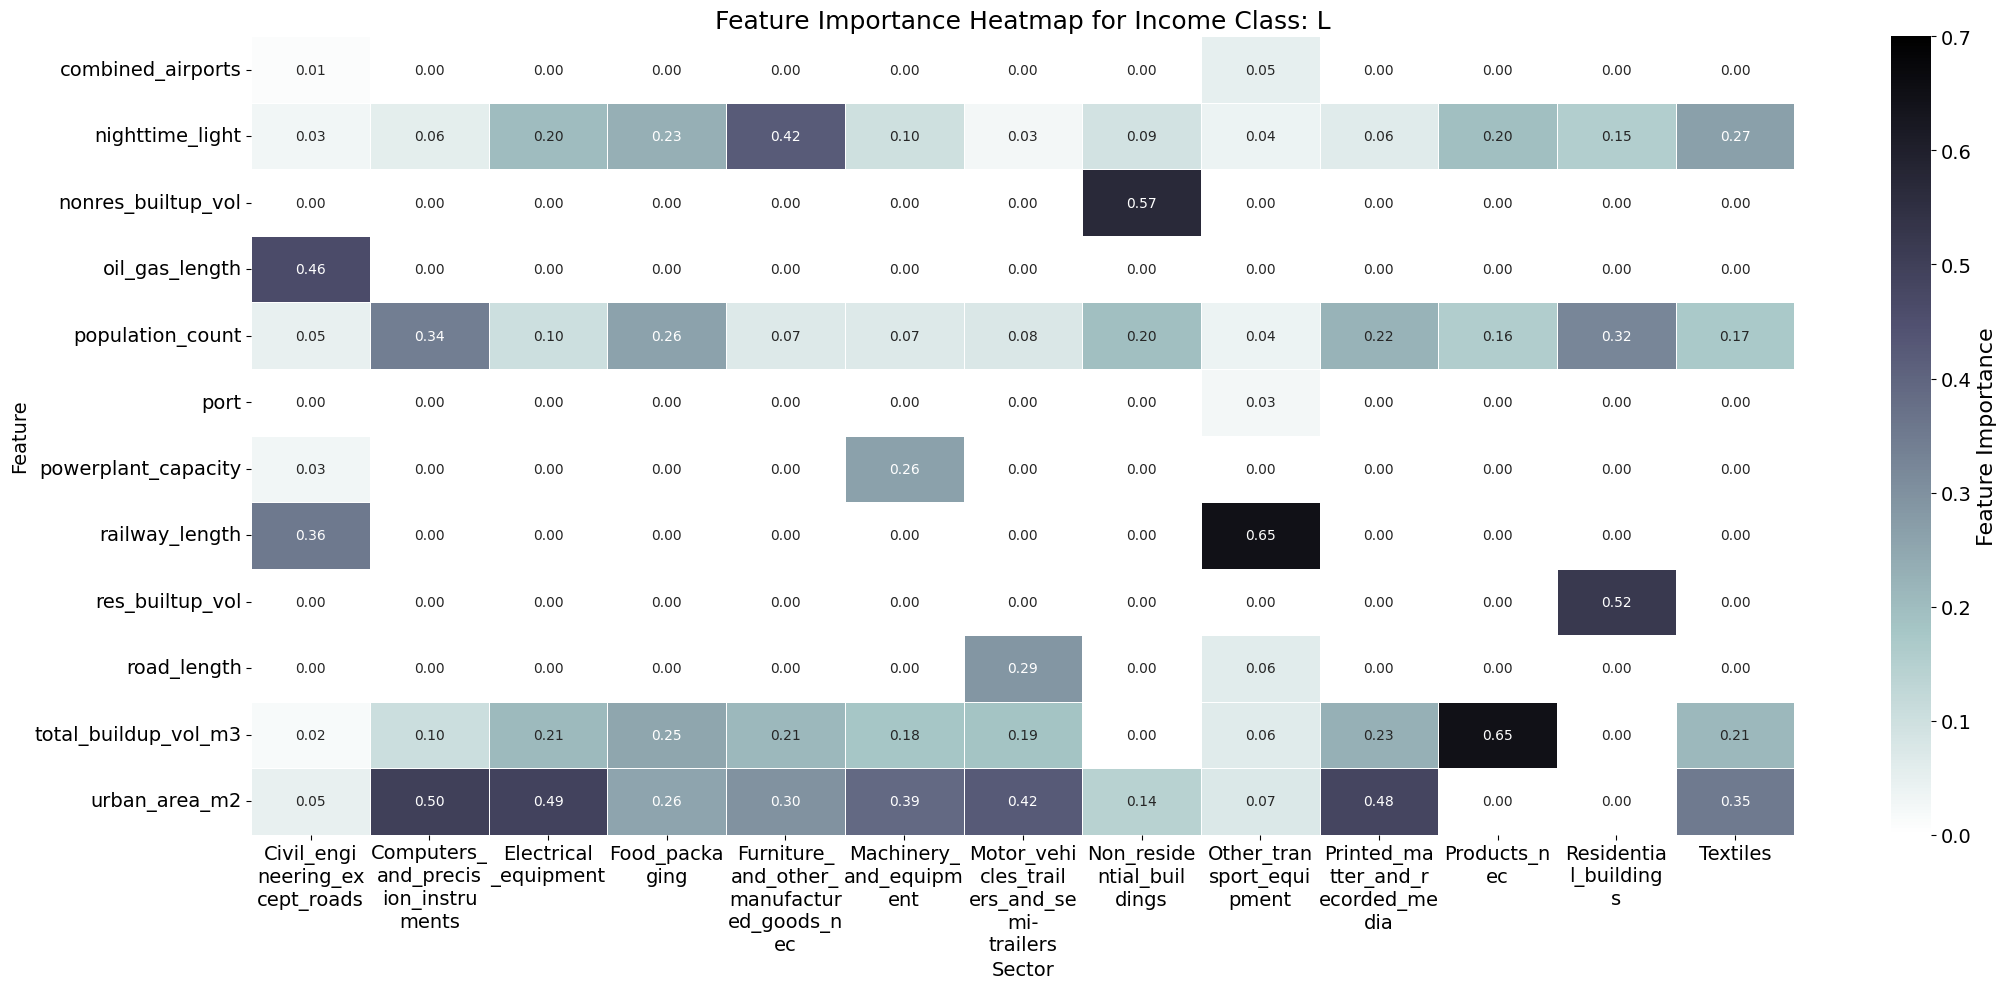

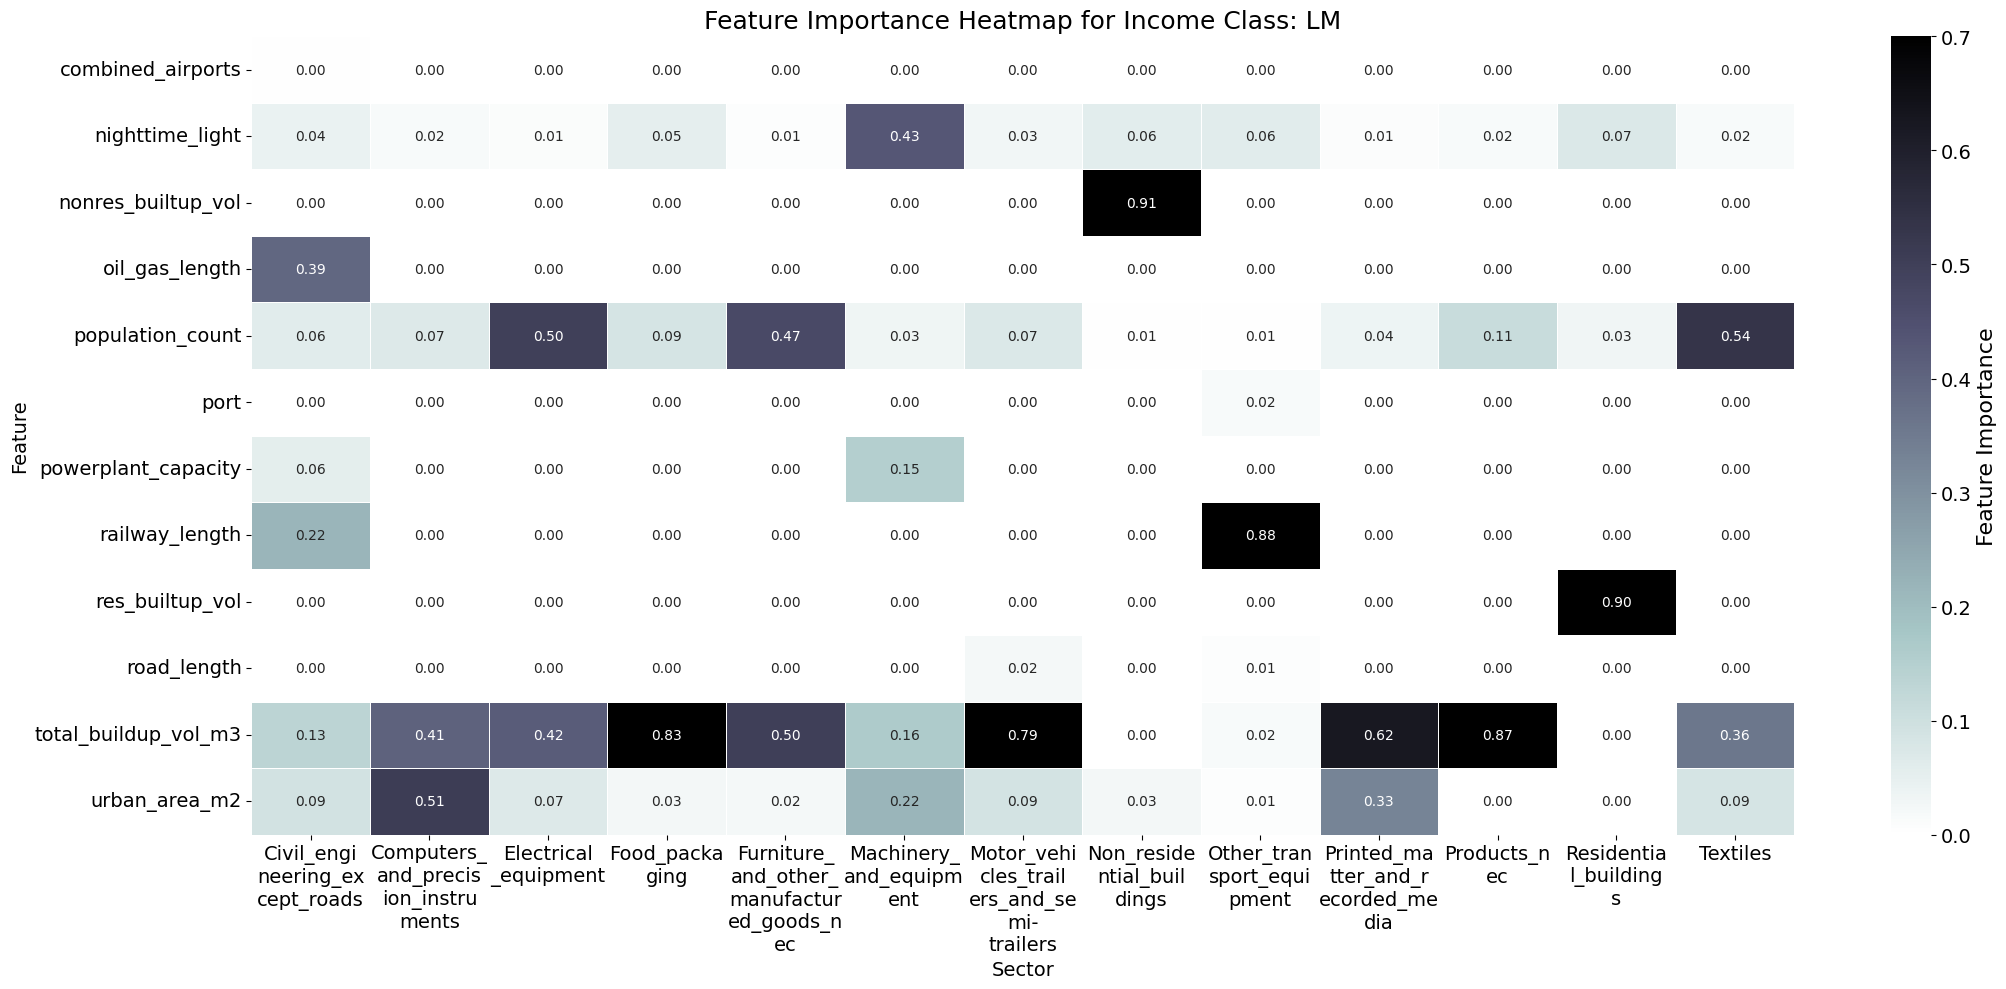

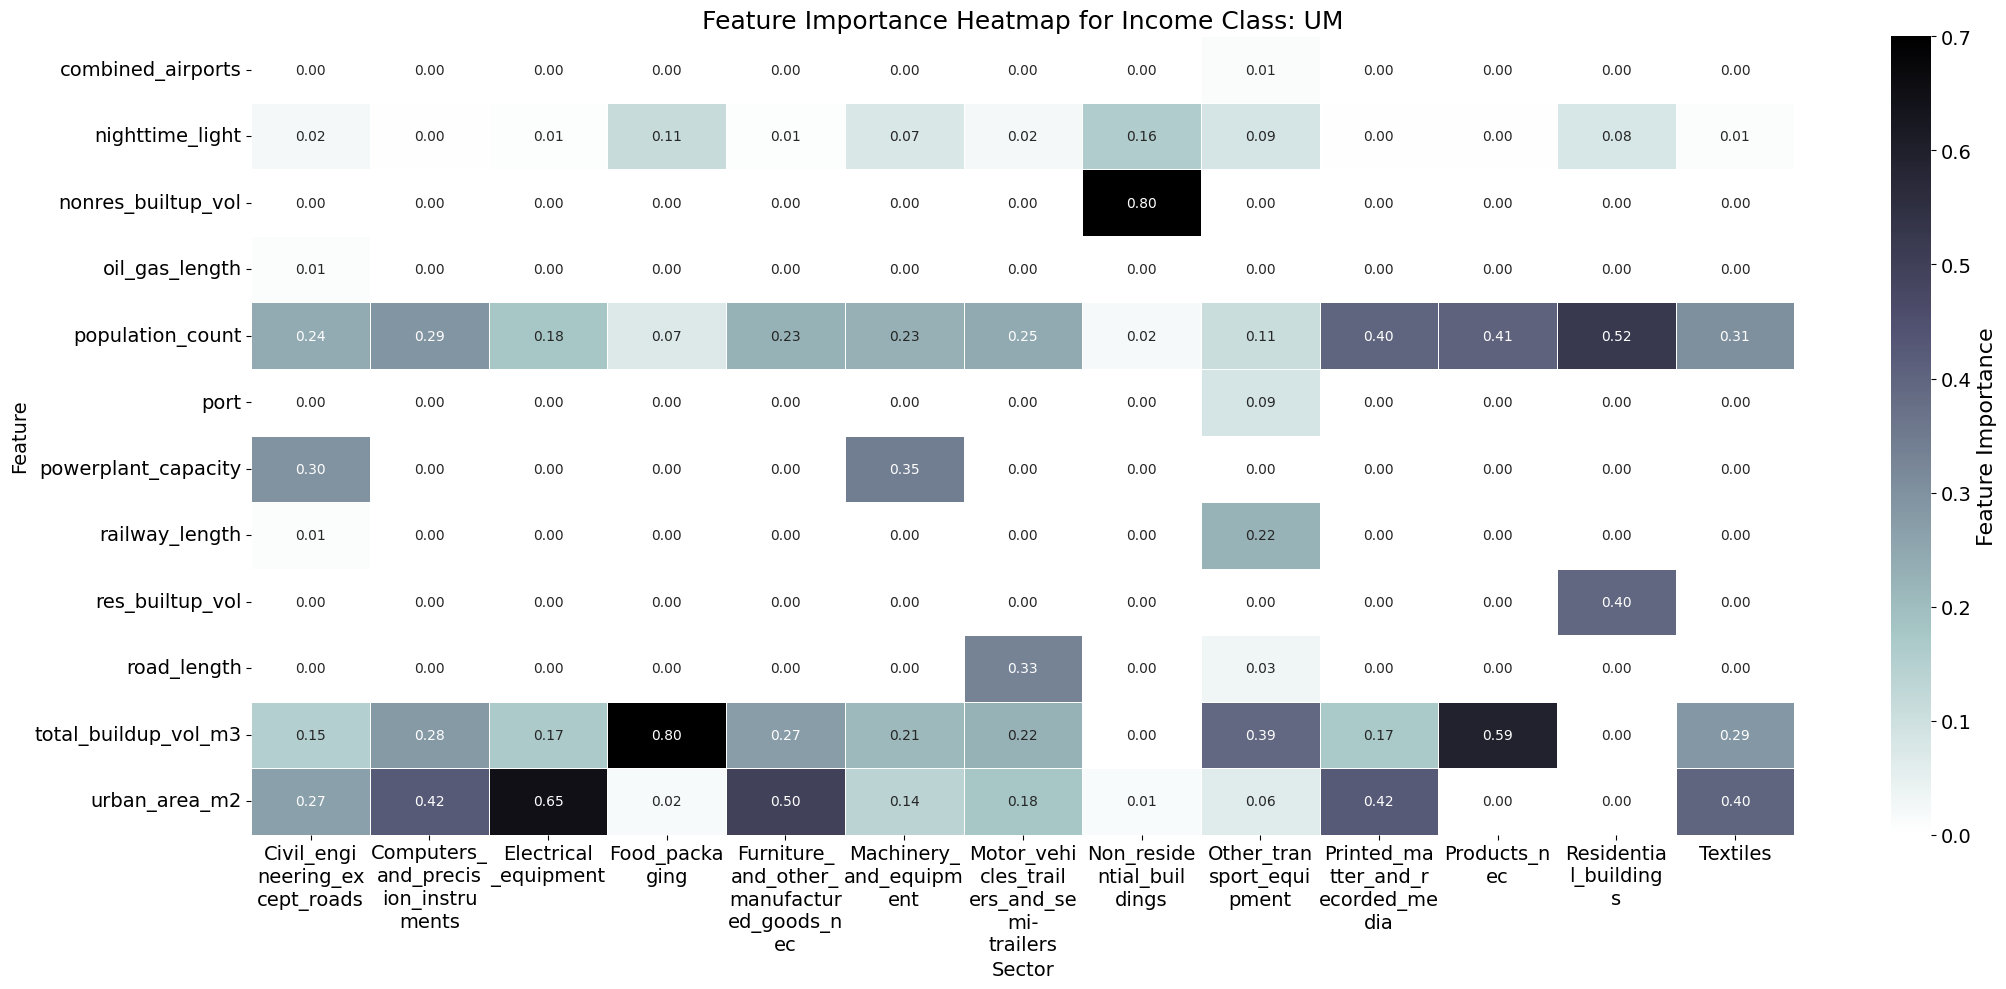

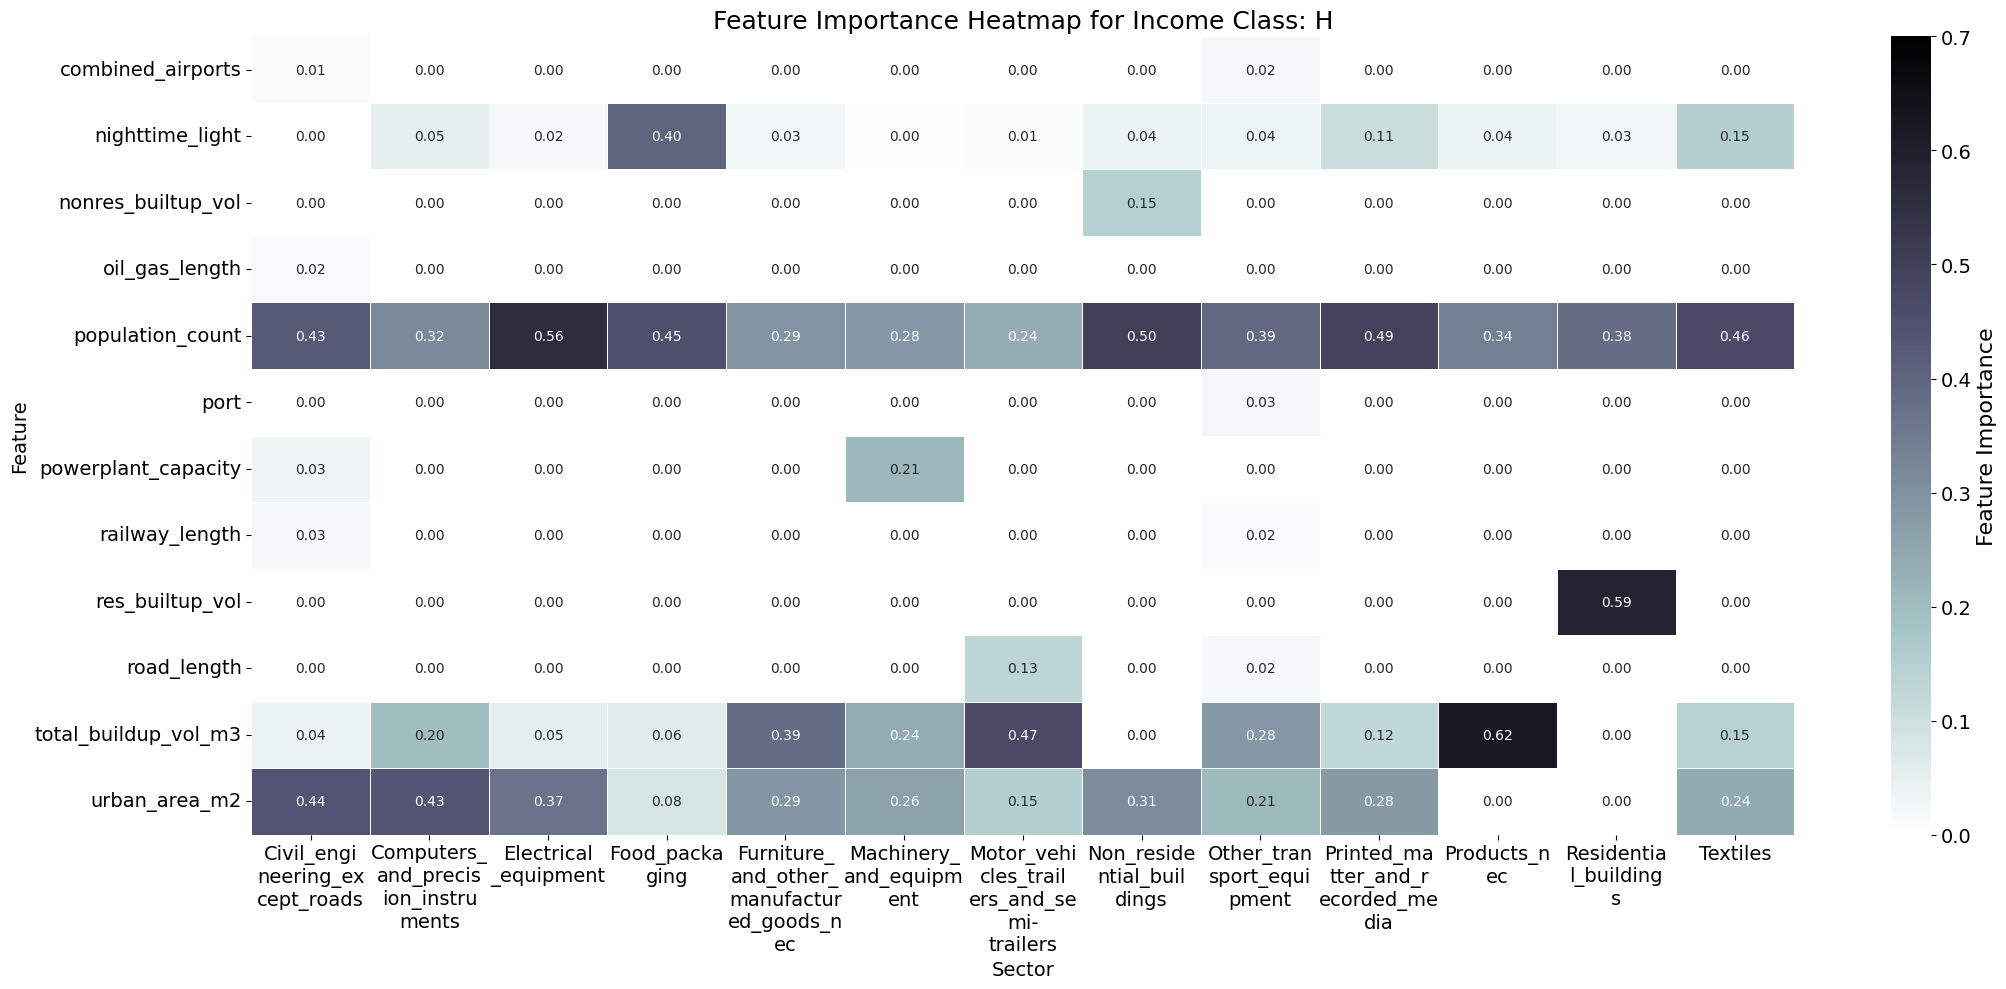

In [143]:
# Function to wrap text for axis labels
def wrap_labels(labels, width):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Initialize a list to hold all data
combined_data = []

# Loop through sectors to read and process feature importance data
for sector, predictors in sector_surrogate_variables.items():
    # Read the feature importance CSV for the sector
    csv_file = f"{sector}_feature_importances.csv"
    df_im = pd.read_csv(output_path + csv_file)
    
    # Add columns for the sector and features
    df_im['Sector'] = sector
    
    # Append to combined data
    combined_data.append(df_im)

# Combine all sector data into a single DataFrame
combined_df = pd.concat(combined_data)

# Loop through each income class and generate a heatmap
for income_class in combined_df['Income_Class'].unique():
    # Filter the data for the current income class
    income_class_df = combined_df[combined_df['Income_Class'] == income_class]
    
    # Pivot the data for heatmap plotting
    heatmap_df = income_class_df.pivot_table(
        index='Feature', 
        columns='Sector', 
        values='Importance', 
        fill_value=0
    )
    
    # Wrap the column labels (sector names)
    wrapped_columns = wrap_labels(heatmap_df.columns, width=10)

    # Plot the heatmap
    plt.figure(figsize=(22, 10))  # Set figure size
    sns.heatmap(
        heatmap_df,
        cmap="bone_r",
        linewidths=0.5,
        annot=True,  # Annotate cells with importance values
        fmt=".2f",
        cbar_kws={'label': 'Feature Importance'},
        vmin=0,  # Set the minimum value of the color bar
        vmax=0.7   # Set the maximum value of the color bar
    )

    # Customize the title and labels
    plt.title(f'Feature Importance Heatmap for Income Class: {income_class}', fontsize=18)
    plt.xlabel('Sector', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    # Update x-tick labels to be centered
    plt.xticks(
        ticks=np.arange(len(wrapped_columns)) + 0.5,  # Center labels by offsetting by 0.5
        labels=wrapped_columns,                      # Wrapped and shortened labels
        rotation=0,                                  # No rotation
        ha='center',                                 # Horizontal alignment at the center
        fontsize=14
    )

    # Update y-tick labels (optional for formatting)
    plt.yticks(fontsize=14)
    # Get the colorbar object
    cbar = plt.gcf().axes[-1]  # The last axis is usually the colorbar
    cbar.set_ylabel('Feature Importance', fontsize=16)  # increase colorbar label
    cbar.tick_params(labelsize=14)  # increase tick label size
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.savefig(plot_path + f"feature_importance_{income_class}.pdf", dpi=600)
    plt.show()


# Gridding End-Uses

In [99]:
df = pd.read_csv(output_path + "MISO2_iron_steel_2000-2016_srb_xkx_fixed_ic_added.csv")
df.rename(columns={'Income_Class': 'income_class'}, inplace=True)
df.drop(['Unnamed: 0.1'], axis=1, inplace=True)
df

,Unnamed: 0.1,region,Year,stock,ISO3,sector,Unnamed: 0,urban_area_m2,total_buildup_vol_m3,nonres_builtup_vol,res_builtup_vol,population_count,nighttime_light,road_length,railway_length,oil_gas_length,powerplant_capacity,combined_airports,port,income_class
0,0,Afghanistan,2000,656.238706,AFG,Civil_engineering_except_roads,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
1,1,Afghanistan,2000,12.170161,AFG,Computers_and_precision_instruments,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
2,2,Afghanistan,2000,41.875369,AFG,Electrical_equipment,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
3,3,Afghanistan,2000,0.978662,AFG,Food_packaging,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
4,4,Afghanistan,2000,24.049863,AFG,Furniture_and_other_manufactured_goods_nec,1,1.325966e+09,2.883048e+09,2.624811e+07,2.853239e+09,2.236783e+07,223.552520,86750.261473,446.878649,1861.176979,4.262061e+08,4.731442,0.0,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39112,39112,Zimbabwe,2016,347.818992,ZWE,Other_transport_equipment,4181,6.429363e+08,3.145239e+09,1.398299e+08,2.972915e+09,1.380970e+07,222.694898,69079.616744,2667.625927,0.262064,1.823672e+09,6.713801,0.0,L
39113,39113,Zimbabwe,2016,33.016761,ZWE,Printed_matter_and_recorded_media,4181,6.429363e+08,3.145239e+09,1.398299e+08,2.972915e+09,1.380970e+07,222.694898,69079.616744,2667.625927,0.262064,1.823672e+09,6.713801,0.0,L
39114,39114,Zimbabwe,2016,104.209098,ZWE,Products_nec,4181,6.429363e+08,3.145239e+09,1.398299e+08,2.972915e+09,1.380970e+07,222.694898,69079.616744,2667.625927,0.262064,1.823672e+09,6.713801,0.0,L
39115,39115,Zimbabwe,2016,2279.555194,ZWE,Residential_buildings,4181,6.429363e+08,3.145239e+09,1.398299e+08,2.972915e+09,1.380970e+07,222.694898,69079.616744,2667.625927,0.262064,1.823672e+09,6.713801,0.0,L


In [102]:
importance_csvs = glob.glob(output_path + "*_feature_importances.csv")
importance_csvs

['/Users/faisal/Documents/iESD/FeFlow/data/output/Products_nec_feature_importances.csv',
 '/Users/faisal/Documents/iESD/FeFlow/data/output/Printed_matter_and_recorded_media_feature_importances.csv',
 '/Users/faisal/Documents/iESD/FeFlow/data/output/Furniture_and_other_manufactured_goods_nec_feature_importances.csv',
 '/Users/faisal/Documents/iESD/FeFlow/data/output/Residential_buildings_feature_importances.csv',
 '/Users/faisal/Documents/iESD/FeFlow/data/output/Motor_vehicles_trailers_and_semi-trailers_feature_importances.csv',
 '/Users/faisal/Documents/iESD/FeFlow/data/output/Non_residential_buildings_feature_importances.csv',
 '/Users/faisal/Documents/iESD/FeFlow/data/output/Other_transport_equipment_feature_importances.csv',
 '/Users/faisal/Documents/iESD/FeFlow/data/output/Civil_engineering_except_roads_feature_importances.csv',
 '/Users/faisal/Documents/iESD/FeFlow/data/output/Machinery_and_equipment_feature_importances.csv',
 '/Users/faisal/Documents/iESD/FeFlow/data/output/Compu

In [103]:
# Define the sectors and predictors dictionary as before
sector_surrogate_variables = {
    "Residential_buildings": ["res_builtup_vol", "population_count", "nighttime_light"],
    "Non_residential_buildings": ["nonres_builtup_vol", "population_count", "nighttime_light", "urban_area_m2"],
    "Machinery_and_equipment": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2", "powerplant_capacity"],
    "Computers_and_precision_instruments": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2"],
    "Electrical_equipment": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2"],
    "Civil_engineering_except_roads": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2", "railway_length", "oil_gas_length", "powerplant_capacity", "combined_airports"],
    "Motor_vehicles_trailers_and_semi-trailers": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2", "road_length"],
    "Other_transport_equipment": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2", "road_length", "railway_length", "port", "combined_airports"],
    "Furniture_and_other_manufactured_goods_nec": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2"],
    "Printed_matter_and_recorded_media": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2"],
    "Food_packaging": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2"],
    "Products_nec": ["total_buildup_vol_m3", "population_count", "nighttime_light"],
    "Textiles": ["total_buildup_vol_m3", "population_count", "nighttime_light", "urban_area_m2"]
}

In [105]:
country_frac_path = pkg_resources.files(ssm).joinpath("data/country_fraction.1deg.2000-2023.a.nc")
country_frac = xr.open_dataset(country_frac_path)
country_frac = country_frac.sel(time=slice('2000-01-01', '2016-01-01'))
ds_surrogate = xr.open_dataset(output_path + "combined_surrogate.2000-2016.a.nc")
ds_surrogate

<xarray.Dataset> Size: 106MB
Dimensions:               (lon: 360, lat: 180, time: 17)
Coordinates:
  * lon                   (lon) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * lat                   (lat) float64 1kB 89.5 88.5 87.5 ... -87.5 -88.5 -89.5
  * time                  (time) datetime64[ns] 136B 2000-01-01 ... 2016-01-01
Data variables:
    urban_area_m2         (lat, lon, time) float64 9MB ...
    total_buildup_vol_m3  (time, lat, lon) float64 9MB ...
    nonres_builtup_vol    (time, lat, lon) float64 9MB ...
    res_builtup_vol       (time, lat, lon) float64 9MB ...
    population_count      (time, lat, lon) float64 9MB ...
    nighttime_light       (time, lat, lon) float64 9MB ...
    port                  (time, lat, lon) float64 9MB ...
    road_length           (time, lat, lon) float64 9MB ...
    railway_length        (time, lat, lon) float64 9MB ...
    oil_gas_length        (time, lat, lon) float64 9MB ...
    powerplant_capacity   (time, lat, lon) float64 9MB ...
    combined_airports     (time, lat, lon) float64 9MB ...

In [106]:
grid_ds_path = pkg_resources.files(ssm).joinpath("data/G.land_sea_mask.1deg.nc")
grid_ds = xr.open_dataset(grid_ds_path)
ds_surrogate = ds_surrogate.fillna(0) * grid_ds["land_frac"].fillna(0)

In [107]:
ds_biome = xr.open_dataset(atlas_path+ "B.biomes.nc")
da = ds_biome["rock_and_ice"].fillna(0) + ds_biome["tundra"].fillna(0)
da = xr.where(da > 0, 0, 1)
da

<xarray.DataArray (lat: 180, lon: 360)> Size: 518kB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], shape=(180, 360))
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

In [108]:
ds_surrogate = ds_surrogate.fillna(0) * da
ds_surrogate = ds_surrogate.where(ds_surrogate != 0, np.nan)
ds_surrogate

<xarray.Dataset> Size: 106MB
Dimensions:               (lat: 180, lon: 360, time: 17)
Coordinates:
  * lon                   (lon) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * lat                   (lat) float64 1kB 89.5 88.5 87.5 ... -87.5 -88.5 -89.5
  * time                  (time) datetime64[ns] 136B 2000-01-01 ... 2016-01-01
Data variables:
    urban_area_m2         (lat, lon, time) float64 9MB nan nan nan ... nan nan
    total_buildup_vol_m3  (time, lat, lon) float64 9MB nan nan nan ... nan nan
    nonres_builtup_vol    (time, lat, lon) float64 9MB nan nan nan ... nan nan
    res_builtup_vol       (time, lat, lon) float64 9MB nan nan nan ... nan nan
    population_count      (time, lat, lon) float64 9MB nan nan nan ... nan nan
    nighttime_light       (time, lat, lon) float64 9MB nan nan nan ... nan nan
    port                  (time, lat, lon) float64 9MB nan nan nan ... nan nan
    road_length           (time, lat, lon) float64 9MB nan nan nan ... nan nan
    railway_length        (time, lat, lon) float64 9MB nan nan nan ... nan nan
    oil_gas_length        (time, lat, lon) float64 9MB nan nan nan ... nan nan
    powerplant_capacity   (time, lat, lon) float64 9MB nan nan nan ... nan nan
    combined_airports     (time, lat, lon) float64 9MB nan nan nan ... nan nan

In [110]:
def apply_importance_multiplication(ds, importance_dict):
    """
    Multiplies the values of a dataset by corresponding importance values from a dictionary.

    Parameters:
    ds (xarray.Dataset): The input xarray dataset (with lat and lon dimensions).
    importance_dict (dict): A dictionary with keys as ISO3 codes and values as importance multipliers.

    Returns:
    xarray.DataArray: The resulting xarray dataset with the processed feature.
    """
    # Use the first variable as a template
    template_var = list(ds.data_vars)[0]
    
    # Initialize a new DataArray for storing the results
    result_array = xr.DataArray(
        np.zeros(ds[template_var].shape, dtype=ds[template_var].dtype),
        coords=ds[template_var].coords,
        dims=ds[template_var].dims,
    )

    # Iterate over ISO3 codes and apply the importance multiplier
    for iso3 in ds.data_vars:
        if iso3 in importance_dict:
            importance = importance_dict[iso3]
            # Multiply the data by the importance
            temp_result = ds[iso3] * importance
            # Ensure no NaNs in temp_result
            temp_result = temp_result.fillna(0)
            # Explicit alignment
            temp_result_aligned, result_array_aligned = xr.align(temp_result, result_array, join="exact")
            # Update result_array
            result_array = result_array_aligned + temp_result_aligned
    
    return result_array


def single_time_weighted_average(ds_surrogate, country_frac, df, features_used_for_training, dataset_name, time):

    ds_merged = ds_surrogate

    # Initialize an empty dataset for storing the final summed results
    final_result = xr.DataArray(
        np.zeros_like(ds_merged[features_used_for_training[0]].values),
        coords=ds_merged[features_used_for_training[0]].coords,
        dims=ds_merged[features_used_for_training[0]].dims,
    )

    # Loop over each feature, apply importance multiplication, and sum the results
    for feature in features_used_for_training:
        # below line is newly added to normalize
        # ds_merged[feature] = (ds_merged[feature] - ds_merged[feature].min()) / (ds_merged[feature].max() - ds_merged[feature].min())
        # Multiply the feature values by the country fraction
        ds_ft = ds_merged[feature].fillna(0) * country_frac
        
        # Construct the importance dictionary for the current feature
        feature_im = feature + "_im"
        im_dict = df.set_index('ISO3')[feature_im].to_dict()
        
        # Apply the importance multipliers
        ds_result = apply_importance_multiplication(ds_ft, im_dict)
        
        # Add the resulting feature data to the final result
        final_result += ds_result
        
    
    # Assign the final summed result to a new variable in an xarray dataset
    # final_result /= final_result.sum(dim=['lat', 'lon'])
    # normalize the value
    global_sum = final_result.sum(dim=['lat', 'lon'])
    final_result = final_result/ global_sum
    ds_merged[dataset_name] = final_result

    time_d = pd.to_datetime(time)
    ds_merged = ds_merged.assign_coords(time=time_d)
    ds_merged = ds_merged.expand_dims(dim='time')

    return ds_merged


In [ ]:
# Loop through each sector, calculate feature importance, and save them in a single CSV file
for sector, predictors in sector_surrogate_variables.items():
   # Initialize an empty DataFrame to store feature importances for all income classes
   csv_file = f"{sector}_feature_importances.csv"
   df_im = pd.read_csv(output_path + csv_file)
   importance_dict = df_im.pivot(index='Feature', columns='Income_Class', values='Importance')
   df_sector = df[(df["sector"] == sector)].copy()

   for feature in predictors:
      df_sector[f'{feature}_im'] = df_sector.apply(lambda row: importance_dict.loc[feature, row['income_class']], axis=1)
   
   dataset_list = []
   for time in df["Year"].unique():
      df_sector_time = df_sector[df_sector["Year"] == time]
      time_str = f'{time}-01-01'
      # Select only the variables in predictors
      ds_surrogate_time = ds_surrogate[predictors].sel(time=time_str).drop_vars('time')
      country_frac_time = country_frac.sel(time=time_str).drop_vars('time')
      ds_mod = single_time_weighted_average(ds_surrogate_time, country_frac_time, df_sector_time, predictors, sector, time_str)
      dataset_list.append(ds_mod)

   ds_mod_mg = xr.merge(dataset_list)
   ds_mod_mg.to_netcdf(output_path + sector + "_surrogate.2000-2016.a.nc")


In [ ]:
variables = [
    "Residential_buildings",
    "Non_residential_buildings",
    "Machinery_and_equipment",
    "Civil_engineering_except_roads", 
    "Motor_vehicles_trailers_and_semi-trailers", 
    "Other_transport_equipment",
    "Computers_and_precision_instruments",
    "Electrical_equipment",
    "Furniture_and_other_manufactured_goods_nec",
    "Printed_matter_and_recorded_media",
    "Food_packaging",
    "Products_nec",
    "Textiles"
]

long_names = [
    "Residential buildings",
    "Non residential buildings",
    "Machinery and equipment",
    "Civil engineering except roads",
    "Motor vehicles trailers and semi trailers",
    "Other transport equipment",
    "Computers and precision instruments",
    "Electrical equipment",
    "Furniture and other manufactured goods nec",
    "Printed matter and recorded media",
    "Food packaging",
    "Products nec",
    "Textiles"
]


In [ ]:
dList_sg = []
for var in variables:
    filename = var + "_surrogate.2000-2016.a.nc"
    ds_sg = xr.open_dataset(output_path + filename)
    ds_sg = ds_sg[[var]]
    dList_sg.append(ds_sg)

ds_sg = xr.merge(dList_sg)
ds_sg = ds_sg.where(ds_sg != 0, np.nan)
threshold = 1e-9  # Define your threshold, e.g., values smaller than 1e-6
ds_sg = ds_sg.where(ds_sg >= threshold, np.nan)
ds_sg

<xarray.Dataset> Size: 115MB
Dimensions:                                     (time: 17, lat: 180, lon: 360)
Coordinates:
  * lon                                         (lon) float64 3kB -179.5 ... ...
  * lat                                         (lat) float64 1kB 89.5 ... -89.5
  * time                                        (time) datetime64[ns] 136B 20...
Data variables: (12/13)
    Residential_buildings                       (time, lat, lon) float64 9MB ...
    Non_residential_buildings                   (time, lat, lon) float64 9MB ...
    Machinery_and_equipment                     (time, lat, lon) float64 9MB ...
    Civil_engineering_except_roads              (time, lat, lon) float64 9MB ...
    Motor_vehicles_trailers_and_semi-trailers   (time, lat, lon) float64 9MB ...
    Other_transport_equipment                   (time, lat, lon) float64 9MB ...
    ...                                          ...
    Electrical_equipment                        (time, lat, lon) float64 9MB ...
    Furniture_and_other_manufactured_goods_nec  (time, lat, lon) float64 9MB ...
    Printed_matter_and_recorded_media           (time, lat, lon) float64 9MB ...
    Food_packaging                              (time, lat, lon) float64 9MB ...
    Products_nec                                (time, lat, lon) float64 9MB ...
    Textiles                                    (time, lat, lon) float64 9MB ...

In [ ]:
source = "Dominik, et al. (2024). From Extraction to End-uses and Waste Management: Modelling Economy-wide Material Cycles and Stock Dynamics Around the World. Available at SSRN 4794611."

for var, long_name in zip(variables, long_names):
    # Filter the DataFrame for the specific sector
    df_sector = df[df["sector"] == var].copy()
    df_sector["stock_g"] = df_sector["stock"] * 1e9  # kt to g
    filename = var + "_surrogate.2000-2016.a.nc"
    ds_sg = xr.open_dataset(output_path + filename)

    # Initialize an empty list to store datasets for all time steps
    dataset_list = []
    
    # Process each time step
    for time in df["Year"].unique():
        df_time = df_sector[df_sector["Year"] == time].copy()
        time_str = f'{time}-01-01'
        
        # Create the dataset for the current time step
        ds = ssm.table_2_grid(
            surrogate_data=ds_sg,
            surrogate_variable=var,
            tabular_column="stock_g", 
            tabular_data=df_time
            variable_name=var, 
            long_name=long_name, 
            units="g m-2", 
            time=time_str, 
            source=source, 
            normalize_by_area="yes", 
            verbose="yes"
        )
        
        # Append the dataset to the list
        dataset_list.append(ds)
    
    # Merge all time-step datasets into a single dataset
    merged_ds = xr.merge(dataset_list)
    
    # Save the merged dataset to a single NetCDF file
    nc_name = var + '.2000-2016.a.nc'
    merged_ds.to_netcdf(output_path + nc_name)
    print(f"Saved NetCDF for {var}: {output_path + nc_name}")


Distributing Residential_buildings onto Residential_buildings.
Global sum of jurisdictional dataset : 3794869731589235.0
Global stats after gridding: 3794869731589236.00
Distributing Residential_buildings onto Residential_buildings.
Global sum of jurisdictional dataset : 3848341777872807.5
Global stats after gridding: 3848341777872807.00
Distributing Residential_buildings onto Residential_buildings.
Global sum of jurisdictional dataset : 3907497128332338.0
Global stats after gridding: 3907497128332338.50
Distributing Residential_buildings onto Residential_buildings.
Global sum of jurisdictional dataset : 3967892165391387.5
Global stats after gridding: 3967892165391387.50
Distributing Residential_buildings onto Residential_buildings.
Global sum of jurisdictional dataset : 4035317582573553.0
Global stats after gridding: 4035317582573553.50
Distributing Residential_buildings onto Residential_buildings.
Global sum of jurisdictional dataset : 4110950157701249.0
Global stats after gridding: 

In [112]:
nc_paths = glob.glob(output_path + "*.2000-2016.a.nc")
nc_paths = [path for path in nc_paths if "surrogate" not in path]

dataset_list = []
for nc in nc_paths:
    ds_s = xr.open_dataset(nc)
    dataset_list.append(ds_s)

merged_ds = xr.merge(dataset_list)
merged_ds

<xarray.Dataset> Size: 116MB
Dimensions:                                     (lat: 180, lon: 360, time: 17)
Coordinates:
  * lat                                         (lat) float64 1kB -89.5 ... 89.5
  * lon                                         (lon) float64 3kB -179.5 ... ...
  * time                                        (time) datetime64[ns] 136B 20...
Data variables: (12/15)
    Electrical_equipment                        (time, lat, lon) float64 9MB ...
    grid_area                                   (lat, lon) float64 518kB 1.08...
    land_frac                                   (lat, lon) float64 518kB 0.00...
    Non_residential_buildings                   (time, lat, lon) float64 9MB ...
    Civil_engineering_except_roads              (time, lat, lon) float64 9MB ...
    Products_nec                                (time, lat, lon) float64 9MB ...
    ...                                          ...
    Printed_matter_and_recorded_media           (time, lat, lon) float64 9MB ...
    Residential_buildings                       (time, lat, lon) float64 9MB ...
    Motor_vehicles_trailers_and_semi-trailers   (time, lat, lon) float64 9MB ...
    Textiles                                    (time, lat, lon) float64 9MB ...
    Machinery_and_equipment                     (time, lat, lon) float64 9MB ...
    Computers_and_precision_instruments         (time, lat, lon) float64 9MB ...
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

In [113]:
def sum_all_variables(ds, dataset_name):
    # Variables to exclude from the sum
    exclude_vars = ["time", "lat", "lon", "land_frac", "land_area", "grid_area"]
    
    # Identify the variables to sum
    variables_list = [var for var in ds.data_vars if var not in exclude_vars]

    # Initialize an empty DataArray to store the sum
    da_sum = None

    # Sum all variables across dimensions except 'time'
    for var in variables_list:
        # Replace NaN values with zeros
        ds_var_filled = ds[var].fillna(0)
        
        # Perform the sum while keeping the time dimension
        if da_sum is None:
            da_sum = ds_var_filled
        else:
            da_sum += ds_var_filled

    # Convert the summed DataArray to a Dataset
    ds_sum = da_sum.to_dataset(name=dataset_name)

    return ds_sum

In [114]:
attrs = {'long_name': 'Gross Iron/Steel',
 'units': 'g m-2',
 'source': 'Dominik, et al. (2024). From Extraction to End-uses and Waste Management: Modelling Economy-wide Material Cycles and Stock Dynamics Around the World. Available at SSRN 4794611.'}

In [115]:
gross_ds = sum_all_variables(merged_ds, 'stock_total')
gross_ds = gross_ds.where(gross_ds["stock_total"] != 0, np.nan)
# Modify the long_name attribute
gross_ds["stock_total"].attrs = attrs
gross_ds

<xarray.Dataset> Size: 9MB
Dimensions:      (time: 17, lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon          (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time         (time) datetime64[ns] 136B 2000-01-01 2001-01-01 ... 2016-01-01
Data variables:
    stock_total  (time, lat, lon) float64 9MB nan nan nan nan ... nan nan nan

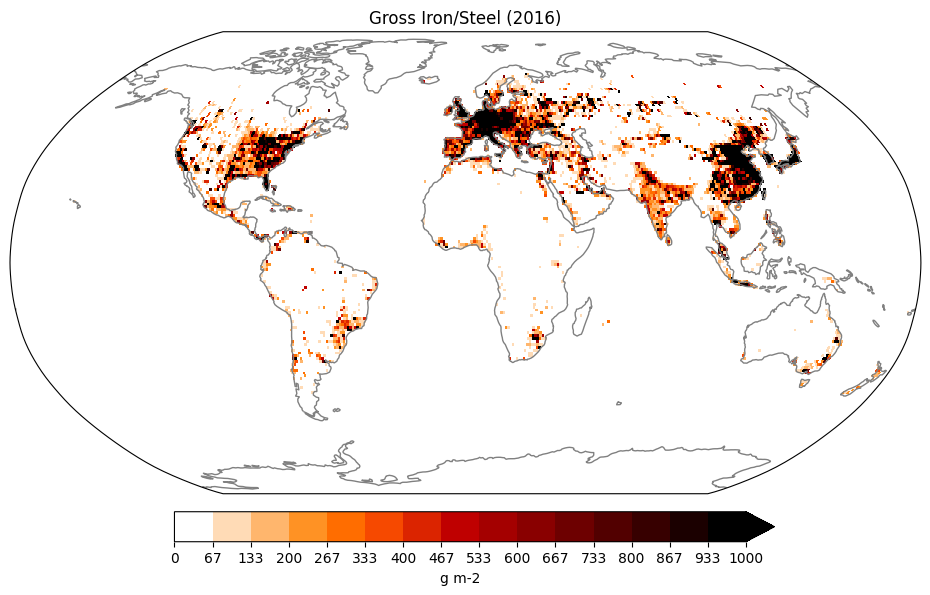

<GeoAxes: title={'center': 'Gross Iron/Steel (2016)'}>

In [116]:
dd = gross_ds.sel(time='2016-01-01')
ssm.plot_map(dd, "stock_total", color="gist_heat_r", vmin=0, vmax=1000, extend_max=True,
            title= 'Gross Iron/Steel (2016)', label='g m-2', levels=15)

In [117]:
merged_ds = xr.merge([merged_ds, gross_ds])
merged_ds

<xarray.Dataset> Size: 124MB
Dimensions:                                     (lat: 180, lon: 360, time: 17)
Coordinates:
  * lat                                         (lat) float64 1kB -89.5 ... 89.5
  * lon                                         (lon) float64 3kB -179.5 ... ...
  * time                                        (time) datetime64[ns] 136B 20...
Data variables: (12/16)
    Electrical_equipment                        (time, lat, lon) float64 9MB ...
    grid_area                                   (lat, lon) float64 518kB 1.08...
    land_frac                                   (lat, lon) float64 518kB 0.00...
    Non_residential_buildings                   (time, lat, lon) float64 9MB ...
    Civil_engineering_except_roads              (time, lat, lon) float64 9MB ...
    Products_nec                                (time, lat, lon) float64 9MB ...
    ...                                          ...
    Residential_buildings                       (time, lat, lon) float64 9MB ...
    Motor_vehicles_trailers_and_semi-trailers   (time, lat, lon) float64 9MB ...
    Textiles                                    (time, lat, lon) float64 9MB ...
    Machinery_and_equipment                     (time, lat, lon) float64 9MB ...
    Computers_and_precision_instruments         (time, lat, lon) float64 9MB ...
    stock_total                                 (time, lat, lon) float64 9MB ...
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

In [118]:
ds = merged_ds
# Sort variables except for the ones that should be at the end
sorted_variables = sorted([var for var in ds.data_vars if var not in ["land_frac", "land_area", "grid_area"]])

# Add the specified variables at the end in the desired order
for var in ["land_frac", "land_area", "grid_area"]:
    if var in ds.data_vars:
        sorted_variables.append(var)

# Create a new dataset with sorted variables and the specified variables at the end
ds_sorted = ds[sorted_variables]
ds_sorted

<xarray.Dataset> Size: 124MB
Dimensions:                                     (time: 17, lat: 180, lon: 360)
Coordinates:
  * lat                                         (lat) float64 1kB -89.5 ... 89.5
  * lon                                         (lon) float64 3kB -179.5 ... ...
  * time                                        (time) datetime64[ns] 136B 20...
Data variables: (12/16)
    Civil_engineering_except_roads              (time, lat, lon) float64 9MB ...
    Computers_and_precision_instruments         (time, lat, lon) float64 9MB ...
    Electrical_equipment                        (time, lat, lon) float64 9MB ...
    Food_packaging                              (time, lat, lon) float64 9MB ...
    Furniture_and_other_manufactured_goods_nec  (time, lat, lon) float64 9MB ...
    Machinery_and_equipment                     (time, lat, lon) float64 9MB ...
    ...                                          ...
    Products_nec                                (time, lat, lon) float64 9MB ...
    Residential_buildings                       (time, lat, lon) float64 9MB ...
    Textiles                                    (time, lat, lon) float64 9MB ...
    stock_total                                 (time, lat, lon) float64 9MB ...
    land_frac                                   (lat, lon) float64 518kB 0.00...
    grid_area                                   (lat, lon) float64 518kB 1.08...
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

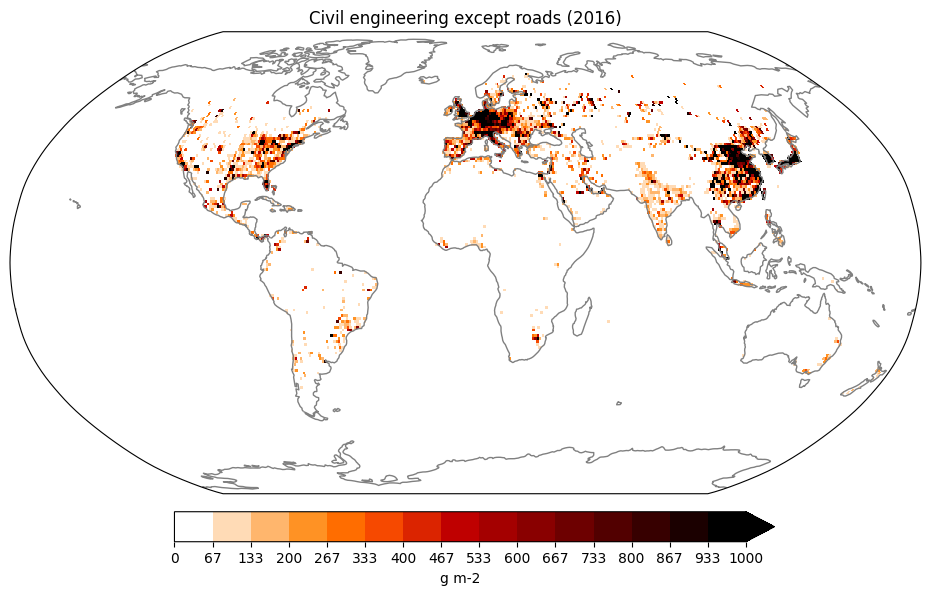

<GeoAxes: title={'center': 'Civil engineering except roads (2016)'}>

In [119]:
dd = ds_sorted.sel(time='2016-01-01')
ssm.plot_map(dd, "Civil_engineering_except_roads", color="gist_heat_r", vmin=0, vmax=1000, extend_max=True,
            title= 'Civil engineering except roads (2016)', label='g m-2', levels=15)

In [120]:
ds_sorted.to_netcdf(netcdf_path + "T.iron_enduse.2000-2016.a.nc")

# GAS

In [122]:
df = pd.read_csv(raw_path + "MISO2_by_enduse.xlsx.csv")
df = df[df["material"] == "iron_steel"]
df = df[df["name"] == "F_9_10_GAS_enduse"]

# Select the columns from 'region', 'material', and 'sector' + columns from 2000 to 2016
selected_columns = ['region', 'sector'] + [str(year) for year in range(2000, 2017)]
df = df[selected_columns]
df

,region,sector,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
26176,Afghanistan,Residential_buildings,1.008621,1.816772,5.797818,10.448739,17.176262,24.466258,19.336179,18.069722,18.003788,20.027392,29.427401,38.305210,30.586966,36.178998,33.277046,33.638657,46.190905
26177,Afghanistan,Non_residential_buildings,1.425682,2.557210,7.710655,14.031650,23.036385,30.273605,25.325755,24.941386,27.316298,29.828784,43.532442,58.149290,44.585141,52.323149,48.126259,48.649232,66.802667
26178,Afghanistan,Civil_engineering_except_roads,9.828583,18.362470,57.004513,109.905827,178.606723,268.701130,201.693395,201.725427,207.723999,200.977145,287.781106,394.957306,285.119655,306.301516,302.908717,241.920901,310.136821
26179,Afghanistan,Machinery_and_equipment,2.966455,5.500065,17.057454,32.508718,52.933532,78.242041,59.594622,59.203028,61.212667,58.145945,84.993381,118.433352,86.395194,94.821608,92.910308,78.379902,102.294940
26180,Afghanistan,Computers_and_precision_instruments,0.278516,0.516394,1.601502,3.052200,4.969858,7.346040,5.595259,5.558493,5.747175,8.535373,12.258597,16.288114,11.851313,12.906869,12.477391,10.526030,13.737700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52258,Uzbekistan,Furniture_and_other_manufactured_goods_nec,13.047594,14.614205,14.034928,14.810897,18.752706,18.317319,21.346860,28.109088,29.567203,33.961699,30.597781,30.226783,34.265715,43.125500,44.065652,38.701397,37.564130
52259,Uzbekistan,Textiles,25.852939,30.356907,28.647867,30.230227,37.281722,36.963316,43.687217,57.019196,59.640940,63.545288,60.207501,67.462206,67.986803,93.015771,98.353113,86.307770,92.027786
52260,Uzbekistan,Printed_matter_and_recorded_media,0.006768,0.012536,0.008418,0.015361,0.028234,0.021925,0.021563,0.026271,0.022694,0.033019,0.098902,0.039041,0.093814,0.081748,0.146807,0.173016,0.131950
52261,Uzbekistan,Food_packaging,3.778131,2.826980,3.224301,3.397625,5.287145,4.622872,4.780987,6.804821,7.498787,10.777380,9.585054,8.501781,18.126879,17.620895,17.697634,15.571660,6.893829


In [123]:
len(df["sector"].unique())

13

In [124]:
2288 * 13

29744

In [126]:
dfs = []

for sector in df["sector"].unique():
    df_sec = df[df["sector"] == sector]
    df_sec = df_sec.groupby('region', as_index=False).sum(numeric_only=True)
    df_sec = df_sec.melt(id_vars=["region"], var_name='Year', value_name='GAS')
    df_sec = ssm.add_iso3_column(df_sec, "region")
    df_sec["sector"] = sector
    dfs.append(df_sec)

df_merged = pd.concat(dfs)
df_merged

Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']


,region,Year,GAS,ISO3,sector
0,Afghanistan,2000,1.008621,AFG,Residential_buildings
1,Albania,2000,5.514726,ALB,Residential_buildings
2,Algeria,2000,237.881766,DZA,Residential_buildings
3,Angola,2000,12.183826,AGO,Residential_buildings
4,Argentina,2000,216.795239,ARG,Residential_buildings
...,...,...,...,...,...
2987,Venezuela,2016,27.546630,VEN,Products_nec
2988,Vietnam,2016,566.428345,VNM,Products_nec
2989,Yemen,2016,17.489539,YEM,Products_nec
2990,Zambia,2016,8.805757,ZMB,Products_nec


In [127]:
# We need to solve the issue with Serbia (incl. Kosovo) using the population based distribution 
ds_pop = xr.open_dataset(atlas_path + "Bh.population.2000-2020.a.nc")
ds_pop = ds_pop["population_count"].sel(time=slice("2000-01-01", "2016-01-01")).to_dataset()
ds_pop

<xarray.Dataset> Size: 9MB
Dimensions:           (lat: 180, lon: 360, time: 17)
Coordinates:
  * lat               (lat) float64 1kB 89.5 88.5 87.5 ... -87.5 -88.5 -89.5
  * lon               (lon) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * time              (time) datetime64[ns] 136B 2000-01-01 ... 2016-01-01
Data variables:
    population_count  (time, lat, lon) float64 9MB ...

In [195]:
dfs_pop = []

for time in list(range(2000, 2017, 1)):
    time_str = f'{time}-01-01'
    df_pop = ssm.grid_2_table(ds_pop, time=time_str, verbose="yes")
    df_pop["Year"] = time
    dfs_pop.append(df_pop)

df_pop = pd.concat(dfs_pop)
df_pop

List of variables to process: ['population_count']


Global gridded stats for population_count: 6026137017.61
Global tabular stats for population_count: 6025277234.26
List of variables to process: ['population_count']
Global gridded stats for population_count: 6091832416.25
Global tabular stats for population_count: 6090979414.69
List of variables to process: ['population_count']
Global gridded stats for population_count: 6160275646.96
Global tabular stats for population_count: 6159438237.33
List of variables to process: ['population_count']
Global gridded stats for population_count: 6231476681.38
Global tabular stats for population_count: 6230650806.31
List of variables to process: ['population_count']
Global gridded stats for population_count: 6305452795.86
Global tabular stats for population_count: 6304635228.18
List of variables to process: ['population_count']
Global gridded stats for population_count: 6383573394.40
Global tabular stats for population_count: 6382765999.39
List of variables to process: ['population_count']
Global gri

,ISO3,population_count,Year
0,ABW,1.808842e+04,2000
1,AFG,2.236783e+07,2000
2,AGO,2.080530e+07,2000
3,AIA,3.209225e+04,2000
4,ALB,3.140499e+06,2000
...,...,...,...
241,YEM,2.736742e+07,2016
242,ZAF,5.617547e+07,2016
243,ZMB,1.611577e+07,2016
244,ZWE,1.380970e+07,2016


In [196]:
df_srb = df_merged[df_merged["region"] == 'Serbia (incl. Kosovo)']
df_srb

,region,Year,GAS,ISO3,sector
135,Serbia (incl. Kosovo),2000,10.435689,NaN,Residential_buildings
311,Serbia (incl. Kosovo),2001,6.176101,NaN,Residential_buildings
487,Serbia (incl. Kosovo),2002,7.687198,NaN,Residential_buildings
663,Serbia (incl. Kosovo),2003,11.759277,NaN,Residential_buildings
839,Serbia (incl. Kosovo),2004,16.207700,NaN,Residential_buildings
...,...,...,...,...,...
2247,Serbia (incl. Kosovo),2012,19.023762,NaN,Products_nec
2423,Serbia (incl. Kosovo),2013,17.204533,NaN,Products_nec
2599,Serbia (incl. Kosovo),2014,18.756147,NaN,Products_nec
2775,Serbia (incl. Kosovo),2015,29.032068,NaN,Products_nec


In [197]:
df_pop_srb_xkx = df_pop[(df_pop["ISO3"] == "SRB") | (df_pop["ISO3"] == "XKX")]
df_pop_srb_xkx

,ISO3,population_count,Year
200,SRB,8.728448e+06,2000
240,XKX,0.000000e+00,2000
200,SRB,8.707248e+06,2001
240,XKX,0.000000e+00,2001
200,SRB,8.691186e+06,2002
240,XKX,0.000000e+00,2002
200,SRB,8.674887e+06,2003
240,XKX,0.000000e+00,2003
200,SRB,8.662385e+06,2004
240,XKX,0.000000e+00,2004


In [198]:
# Calculate total population per year using .loc to avoid the SettingWithCopyWarning
df_pop_srb_xkx.loc[:, 'total_population'] = df_pop_srb_xkx.groupby('Year')['population_count'].transform('sum')

# Calculate population fraction for each country
df_pop_srb_xkx.loc[:, 'population_fraction'] = df_pop_srb_xkx['population_count'] / df_pop_srb_xkx['total_population']
df_pop_srb_xkx


/var/folders/9q/h2qmn7kd1c74_3nmyzcf2mdc0000gn/T/ipykernel_1674/1947063611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_srb_xkx.loc[:, 'total_population'] = df_pop_srb_xkx.groupby('Year')['population_count'].transform('sum')
/var/folders/9q/h2qmn7kd1c74_3nmyzcf2mdc0000gn/T/ipykernel_1674/1947063611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_srb_xkx.loc[:, 'population_fraction'] = df_pop_srb_xkx['population_count'] / df_pop_srb_xkx['total_population']


,ISO3,population_count,Year,total_population,population_fraction
200,SRB,8.728448e+06,2000,8.728448e+06,1.000000
240,XKX,0.000000e+00,2000,8.728448e+06,0.000000
200,SRB,8.707248e+06,2001,8.707248e+06,1.000000
240,XKX,0.000000e+00,2001,8.707248e+06,0.000000
200,SRB,8.691186e+06,2002,8.691186e+06,1.000000
240,XKX,0.000000e+00,2002,8.691186e+06,0.000000
200,SRB,8.674887e+06,2003,8.674887e+06,1.000000
240,XKX,0.000000e+00,2003,8.674887e+06,0.000000
200,SRB,8.662385e+06,2004,8.662385e+06,1.000000
240,XKX,0.000000e+00,2004,8.662385e+06,0.000000


In [199]:
# Create a dictionary with ISO3, Year as keys and population_fraction as values
population_dict = df_pop_srb_xkx[['ISO3', 'Year', 'population_fraction']].set_index(['ISO3', 'Year']).to_dict()['population_fraction']

# Display the dictionary
population_dict

{('SRB', 2000): 1.0,
 ('XKX', 2000): 0.0,
 ('SRB', 2001): 1.0,
 ('XKX', 2001): 0.0,
 ('SRB', 2002): 1.0,
 ('XKX', 2002): 0.0,
 ('SRB', 2003): 1.0,
 ('XKX', 2003): 0.0,
 ('SRB', 2004): 1.0,
 ('XKX', 2004): 0.0,
 ('SRB', 2005): 1.0,
 ('XKX', 2005): 0.0,
 ('SRB', 2006): 1.0,
 ('XKX', 2006): 0.0,
 ('SRB', 2007): 1.0,
 ('XKX', 2007): 0.0,
 ('SRB', 2008): 0.8459075258368596,
 ('XKX', 2008): 0.1540924741631405,
 ('SRB', 2009): 0.8439552548825058,
 ('XKX', 2009): 0.15604474511749428,
 ('SRB', 2010): 0.8419211671613913,
 ('XKX', 2010): 0.1580788328386088,
 ('SRB', 2011): 0.8398402067317171,
 ('XKX', 2011): 0.16015979326828292,
 ('SRB', 2012): 0.8377873631392693,
 ('XKX', 2012): 0.16221263686073076,
 ('SRB', 2013): 0.8355387938417919,
 ('XKX', 2013): 0.16446120615820814,
 ('SRB', 2014): 0.8337503500157217,
 ('XKX', 2014): 0.1662496499842783,
 ('SRB', 2015): 0.8315228216923879,
 ('XKX', 2015): 0.1684771783076121,
 ('SRB', 2016): 0.8294001300144462,
 ('XKX', 2016): 0.1705998699855537}

In [200]:
# Filter the rows for 'Serbia (incl. Kosovo)'
df_serbia_kosovo = df_merged[df_merged["region"] == 'Serbia (incl. Kosovo)'].copy()

# Create two DataFrames, one for SRB and one for XKX
df_srb = df_serbia_kosovo.copy()
df_xkx = df_serbia_kosovo.copy()

# Set the 'ISO3' for each DataFrame
df_srb['ISO3'] = 'SRB'
df_xkx['ISO3'] = 'XKX'

# Concatenate the two DataFrames
df_duplicated = pd.concat([df_srb, df_xkx])

# Reset the index to avoid duplicates in index
df_duplicated.reset_index(drop=True, inplace=True)
df_duplicated

,region,Year,GAS,ISO3,sector
0,Serbia (incl. Kosovo),2000,10.435689,SRB,Residential_buildings
1,Serbia (incl. Kosovo),2001,6.176101,SRB,Residential_buildings
2,Serbia (incl. Kosovo),2002,7.687198,SRB,Residential_buildings
3,Serbia (incl. Kosovo),2003,11.759277,SRB,Residential_buildings
4,Serbia (incl. Kosovo),2004,16.207700,SRB,Residential_buildings
...,...,...,...,...,...
437,Serbia (incl. Kosovo),2012,19.023762,XKX,Products_nec
438,Serbia (incl. Kosovo),2013,17.204533,XKX,Products_nec
439,Serbia (incl. Kosovo),2014,18.756147,XKX,Products_nec
440,Serbia (incl. Kosovo),2015,29.032068,XKX,Products_nec


In [201]:
df_duplicated["GAS"].sum() # double 

np.float64(29062.16642764529)

In [203]:
# Merge the population data (population_fraction) with the duplicated DataFrame
df_duplicated['Year'] = df_duplicated['Year'].astype(int)
df_duplicated['population_fraction'] = df_duplicated.apply(
    lambda row: population_dict.get((row['ISO3'], row['Year']), 0), axis=1
)

# Now, distribute the stock based on population_fraction
df_duplicated['GAS'] = df_duplicated['GAS'] * df_duplicated['population_fraction']
# Drop the 'population_fraction' column
df_duplicated.drop(columns=['population_fraction'], inplace=True)
df_duplicated

,region,Year,GAS,ISO3,sector
0,Serbia (incl. Kosovo),2000,10.435689,SRB,Residential_buildings
1,Serbia (incl. Kosovo),2001,6.176101,SRB,Residential_buildings
2,Serbia (incl. Kosovo),2002,7.687198,SRB,Residential_buildings
3,Serbia (incl. Kosovo),2003,11.759277,SRB,Residential_buildings
4,Serbia (incl. Kosovo),2004,16.207700,SRB,Residential_buildings
...,...,...,...,...,...
437,Serbia (incl. Kosovo),2012,3.085895,XKX,Products_nec
438,Serbia (incl. Kosovo),2013,2.829478,XKX,Products_nec
439,Serbia (incl. Kosovo),2014,3.118203,XKX,Products_nec
440,Serbia (incl. Kosovo),2015,4.891241,XKX,Products_nec


In [205]:
df_duplicated["GAS"].sum()

np.float64(14531.083213822645)

In [206]:
# Drop rows where 'ISO3' is NaN
df_filtered = df_merged.dropna(subset=['ISO3'])
# Concatenate the df_filtered with df_duplicated
df_final = pd.concat([df_filtered, df_duplicated], ignore_index=True)
# Sort the DataFrame by 'ISO3', 'Year', and 'sector'
df_final = df_final.sort_values(by=['ISO3', 'Year', 'sector'])
df_final

,region,Year,GAS,ISO3,sector
5950,Afghanistan,2000,9.828583,AFG,Civil_engineering_except_roads
11900,Afghanistan,2000,0.278516,AFG,Computers_and_precision_instruments
14875,Afghanistan,2000,0.690460,AFG,Electrical_equipment
32725,Afghanistan,2000,0.930950,AFG,Food_packaging
23800,Afghanistan,2000,0.512879,AFG,Furniture_and_other_manufactured_goods_nec
...,...,...,...,...,...
23799,Zimbabwe,2016,14.113076,ZWE,Other_transport_equipment
32724,Zimbabwe,2016,11.509812,ZWE,Printed_matter_and_recorded_media
38674,Zimbabwe,2016,8.401277,ZWE,Products_nec
2974,Zimbabwe,2016,21.522554,ZWE,Residential_buildings


In [207]:
# final check !
print(df_merged["GAS"].sum())
print(df_final["GAS"].sum())

17905232.776205927
17905232.776205927


In [208]:
df_final.to_csv(output_path + "MISO2_iron_steel_GAS_2000-2016_srb_xkx_fixed.csv")

## Gridding

In [128]:
df = pd.read_csv(output_path + "MISO2_iron_steel_GAS_2000-2016_srb_xkx_fixed.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,region,Year,GAS,ISO3,sector
0,Afghanistan,2000,9.828583,AFG,Civil_engineering_except_roads
1,Afghanistan,2000,0.278516,AFG,Computers_and_precision_instruments
2,Afghanistan,2000,0.690460,AFG,Electrical_equipment
3,Afghanistan,2000,0.930950,AFG,Food_packaging
4,Afghanistan,2000,0.512879,AFG,Furniture_and_other_manufactured_goods_nec
...,...,...,...,...,...
39112,Zimbabwe,2016,14.113076,ZWE,Other_transport_equipment
39113,Zimbabwe,2016,11.509812,ZWE,Printed_matter_and_recorded_media
39114,Zimbabwe,2016,8.401277,ZWE,Products_nec
39115,Zimbabwe,2016,21.522554,ZWE,Residential_buildings


In [211]:
variables = [
    "Residential_buildings",
    "Non_residential_buildings",
    "Machinery_and_equipment",
    "Civil_engineering_except_roads", 
    "Motor_vehicles_trailers_and_semi-trailers", 
    "Other_transport_equipment",
    "Computers_and_precision_instruments",
    "Electrical_equipment",
    "Furniture_and_other_manufactured_goods_nec",
    "Printed_matter_and_recorded_media",
    "Food_packaging",
    "Products_nec",
    "Textiles"
]

long_names = [
    "Residential buildings",
    "Non residential buildings",
    "Machinery and equipment",
    "Civil engineering except roads",
    "Motor vehicles trailers and semi trailers",
    "Other transport equipment",
    "Computers and precision instruments",
    "Electrical equipment",
    "Furniture and other manufactured goods nec",
    "Printed matter and recorded media",
    "Food packaging",
    "Products nec",
    "Textiles"
]


In [212]:
dList_sg = []
for var in variables:
    filename = var + "_surrogate.2000-2016.a.nc"
    ds_sg = xr.open_dataset(output_path + filename)
    ds_sg = ds_sg[[var]]
    dList_sg.append(ds_sg)

ds_sg = xr.merge(dList_sg)
ds_sg = ds_sg.where(ds_sg != 0, np.nan)
threshold = 1e-9  # Define your threshold, e.g., values smaller than 1e-6
ds_sg = ds_sg.where(ds_sg >= threshold, np.nan)
ds_sg

<xarray.Dataset> Size: 115MB
Dimensions:                                     (time: 17, lat: 180, lon: 360)
Coordinates:
  * lon                                         (lon) float64 3kB -179.5 ... ...
  * lat                                         (lat) float64 1kB 89.5 ... -89.5
  * time                                        (time) datetime64[ns] 136B 20...
Data variables: (12/13)
    Residential_buildings                       (time, lat, lon) float64 9MB ...
    Non_residential_buildings                   (time, lat, lon) float64 9MB ...
    Machinery_and_equipment                     (time, lat, lon) float64 9MB ...
    Civil_engineering_except_roads              (time, lat, lon) float64 9MB ...
    Motor_vehicles_trailers_and_semi-trailers   (time, lat, lon) float64 9MB ...
    Other_transport_equipment                   (time, lat, lon) float64 9MB ...
    ...                                          ...
    Electrical_equipment                        (time, lat, lon) float64 9MB ...
    Furniture_and_other_manufactured_goods_nec  (time, lat, lon) float64 9MB ...
    Printed_matter_and_recorded_media           (time, lat, lon) float64 9MB ...
    Food_packaging                              (time, lat, lon) float64 9MB ...
    Products_nec                                (time, lat, lon) float64 9MB ...
    Textiles                                    (time, lat, lon) float64 9MB ...

In [214]:
source = "Dominik, et al. (2024). From Extraction to End-uses and Waste Management: Modelling Economy-wide Material Cycles and Stock Dynamics Around the World. Available at SSRN 4794611."

for var, long_name in zip(variables, long_names):
    # Filter the DataFrame for the specific sector
    df_sector = df[df["sector"] == var].copy()
    df_sector["GAS_g"] = df_sector["GAS"] * 1e9  # kt to g
    filename = var + "_surrogate.2000-2016.a.nc"
    ds_sg = xr.open_dataset(output_path + filename)

    # Initialize an empty list to store datasets for all time steps
    dataset_list = []
    
    # Process each time step
    for time in df["Year"].unique():
        df_time = df_sector[df_sector["Year"] == time].copy()
        time_str = f'{time}-01-01'
        
        # Create the dataset for the current time step
        ds = ssm.table_2_grid(
            surrogate_data=ds_sg,
            surrogate_variable=var,
            tabular_column="GAS_g", 
            tabular_data=df_time 
            variable_name=var, 
            long_name=long_name, 
            units="g m-2 y-1", 
            time=time_str, 
            source=source, 
            normalize_by_area="yes", 
            verbose="yes"
        )
        
        # Append the dataset to the list
        dataset_list.append(ds)
    
    # Merge all time-step datasets into a single dataset
    merged_ds = xr.merge(dataset_list)
    
    # Save the merged dataset to a single NetCDF file
    nc_name = "GAS_" + var + '.2000-2016.a.nc'
    merged_ds.to_netcdf(output_path + nc_name)
    print(f"Saved NetCDF for {var}: {output_path + nc_name}")


Distributing Residential_buildings onto Residential_buildings.
Global sum of jurisdictional dataset : 68934151744121.81
Global stats after gridding: 68934151744121.81
Distributing Residential_buildings onto Residential_buildings.
Global sum of jurisdictional dataset : 67520773146736.64
Global stats after gridding: 67520773146736.65
Distributing Residential_buildings onto Residential_buildings.
Global sum of jurisdictional dataset : 73723195424858.03
Global stats after gridding: 73723195424858.03
Distributing Residential_buildings onto Residential_buildings.
Global sum of jurisdictional dataset : 75508807607243.12
Global stats after gridding: 75508807607243.11
Distributing Residential_buildings onto Residential_buildings.
Global sum of jurisdictional dataset : 83113180268140.11
Global stats after gridding: 83113180268140.14
Distributing Residential_buildings onto Residential_buildings.
Global sum of jurisdictional dataset : 91923556655945.48
Global stats after gridding: 91923556655945.4

In [215]:
nc_paths = glob.glob(output_path + "GAS*")

dataset_list = []
for nc in nc_paths:
    ds_s = xr.open_dataset(nc)
    dataset_list.append(ds_s)

merged_ds = xr.merge(dataset_list)
merged_ds

<xarray.Dataset> Size: 116MB
Dimensions:                                     (lat: 180, lon: 360, time: 17)
Coordinates:
  * lat                                         (lat) float64 1kB -89.5 ... 89.5
  * lon                                         (lon) float64 3kB -179.5 ... ...
  * time                                        (time) datetime64[ns] 136B 20...
Data variables: (12/15)
    Motor_vehicles_trailers_and_semi-trailers   (time, lat, lon) float64 9MB ...
    grid_area                                   (lat, lon) float64 518kB 1.08...
    land_frac                                   (lat, lon) float64 518kB 0.00...
    Electrical_equipment                        (time, lat, lon) float64 9MB ...
    Products_nec                                (time, lat, lon) float64 9MB ...
    Printed_matter_and_recorded_media           (time, lat, lon) float64 9MB ...
    ...                                          ...
    Civil_engineering_except_roads              (time, lat, lon) float64 9MB ...
    Machinery_and_equipment                     (time, lat, lon) float64 9MB ...
    Residential_buildings                       (time, lat, lon) float64 9MB ...
    Computers_and_precision_instruments         (time, lat, lon) float64 9MB ...
    Other_transport_equipment                   (time, lat, lon) float64 9MB ...
    Textiles                                    (time, lat, lon) float64 9MB ...
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

In [216]:
def sum_all_variables(ds, dataset_name):
    # Variables to exclude from the sum
    exclude_vars = ["time", "lat", "lon", "land_frac", "land_area", "grid_area"]
    
    # Identify the variables to sum
    variables_list = [var for var in ds.data_vars if var not in exclude_vars]

    # Initialize an empty DataArray to store the sum
    da_sum = None

    # Sum all variables across dimensions except 'time'
    for var in variables_list:
        # Replace NaN values with zeros
        ds_var_filled = ds[var].fillna(0)
        
        # Perform the sum while keeping the time dimension
        if da_sum is None:
            da_sum = ds_var_filled
        else:
            da_sum += ds_var_filled

    # Convert the summed DataArray to a Dataset
    ds_sum = da_sum.to_dataset(name=dataset_name)

    return ds_sum

In [217]:
attrs = {'long_name': 'Gross Addition to End-uses of Iron/Steel',
 'units': 'gFe m-2 y-1',
 'source': 'Dominik, et al. (2024). From Extraction to End-uses and Waste Management: Modelling Economy-wide Material Cycles and Stock Dynamics Around the World. Available at SSRN 4794611.'}

In [218]:
gross_ds = sum_all_variables(merged_ds, 'GAS_total')
gross_ds = gross_ds.where(gross_ds["GAS_total"] != 0, np.nan)
# Modify the long_name attribute
gross_ds["GAS_total"].attrs = attrs
gross_ds

<xarray.Dataset> Size: 9MB
Dimensions:    (time: 17, lat: 180, lon: 360)
Coordinates:
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time       (time) datetime64[ns] 136B 2000-01-01 2001-01-01 ... 2016-01-01
Data variables:
    GAS_total  (time, lat, lon) float64 9MB nan nan nan nan ... nan nan nan nan

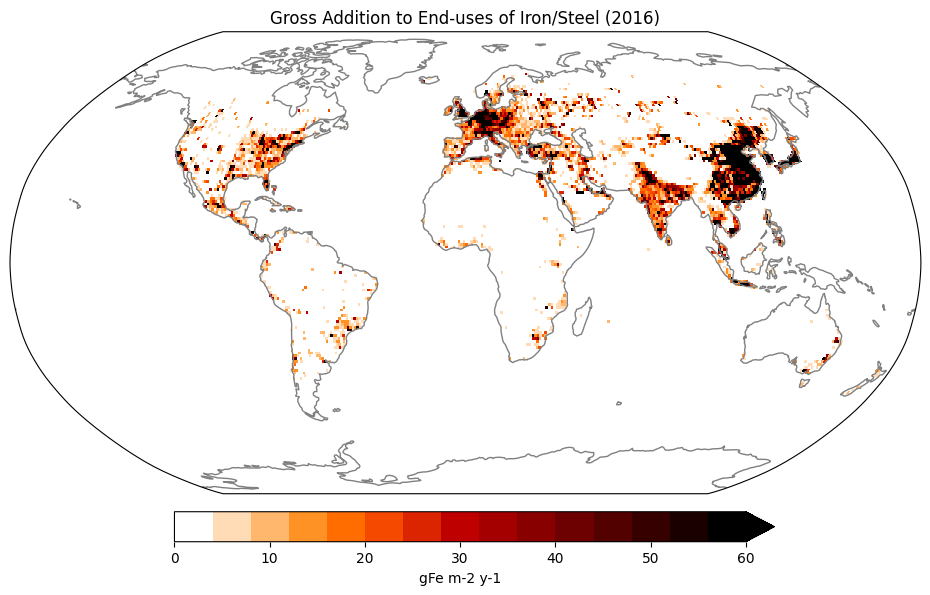

In [224]:
dd = gross_ds.sel(time='2016-01-01')
ssm.plot_map(dd, "GAS_total", color="gist_heat_r", vmin=0, vmax=60, extend_max=True,
            title= 'Gross Addition to End-uses of Iron/Steel (2016)', label='gFe m-2 y-1', levels=15)

In [225]:
combined_ds = xr.merge([merged_ds, gross_ds])
combined_ds

<xarray.Dataset> Size: 124MB
Dimensions:                                     (lat: 180, lon: 360, time: 17)
Coordinates:
  * lat                                         (lat) float64 1kB -89.5 ... 89.5
  * lon                                         (lon) float64 3kB -179.5 ... ...
  * time                                        (time) datetime64[ns] 136B 20...
Data variables: (12/16)
    Motor_vehicles_trailers_and_semi-trailers   (time, lat, lon) float64 9MB ...
    grid_area                                   (lat, lon) float64 518kB 1.08...
    land_frac                                   (lat, lon) float64 518kB 0.00...
    Electrical_equipment                        (time, lat, lon) float64 9MB ...
    Products_nec                                (time, lat, lon) float64 9MB ...
    Printed_matter_and_recorded_media           (time, lat, lon) float64 9MB ...
    ...                                          ...
    Machinery_and_equipment                     (time, lat, lon) float64 9MB ...
    Residential_buildings                       (time, lat, lon) float64 9MB ...
    Computers_and_precision_instruments         (time, lat, lon) float64 9MB ...
    Other_transport_equipment                   (time, lat, lon) float64 9MB ...
    Textiles                                    (time, lat, lon) float64 9MB ...
    GAS_total                                   (time, lat, lon) float64 9MB ...
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

In [ ]:
combined_ds.to_netcdf(netcdf_path + "T.iron_enduse.gas.2000-2016.a.nc")

In [133]:
ds = combined_ds
# Sort variables except for the ones that should be at the end
sorted_variables = sorted([var for var in ds.data_vars if var not in ["land_frac", "land_area", "grid_area"]])

# Add the specified variables at the end in the desired order
for var in ["land_frac", "land_area", "grid_area"]:
    if var in ds.data_vars:
        sorted_variables.append(var)

# Create a new dataset with sorted variables and the specified variables at the end
ds_sorted = ds[sorted_variables]
ds_sorted.to_netcdf(netcdf_path + "T.iron_enduse.gas.2000-2016.a.nc")
ds_sorted

<xarray.Dataset> Size: 124MB
Dimensions:                                     (time: 17, lat: 180, lon: 360)
Coordinates:
  * lon                                         (lon) float64 3kB -179.5 ... ...
  * lat                                         (lat) float64 1kB -89.5 ... 89.5
  * time                                        (time) datetime64[ns] 136B 20...
Data variables: (12/16)
    Civil_engineering_except_roads              (time, lat, lon) float64 9MB ...
    Computers_and_precision_instruments         (time, lat, lon) float64 9MB ...
    Electrical_equipment                        (time, lat, lon) float64 9MB ...
    Food_packaging                              (time, lat, lon) float64 9MB ...
    Furniture_and_other_manufactured_goods_nec  (time, lat, lon) float64 9MB ...
    GAS_total                                   (time, lat, lon) float64 9MB ...
    ...                                          ...
    Printed_matter_and_recorded_media           (time, lat, lon) float64 9MB ...
    Products_nec                                (time, lat, lon) float64 9MB ...
    Residential_buildings                       (time, lat, lon) float64 9MB ...
    Textiles                                    (time, lat, lon) float64 9MB ...
    land_frac                                   (lat, lon) float64 518kB ...
    grid_area                                   (lat, lon) float64 518kB ...
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

# EOL 

### Optimize rates

In [144]:
df_steel = pd.read_csv(output_path + "crude_steel_merged_scrap_added.csv")
df_steel = df_steel.groupby('year')[['steel_from_scrap', "steel_com"]].sum().reset_index()
df_steel["scrap"] = df_steel["steel_from_scrap"] * 1e-3
df_steel["steel_com"] = df_steel["steel_com"] * 1e-3
df_steel["% scrap"] = (df_steel["scrap"] * 100)/df_steel["steel_com"]
df_steel = df_steel.drop(columns=["steel_from_scrap"])
df_steel

,year,steel_com,scrap,% scrap
0,2000,8.491451e+05,368929.631381,43.447182
1,2001,8.510674e+05,362245.777860,42.563702
2,2002,9.040760e+05,376448.441898,41.639024
3,2003,9.743740e+05,393237.703066,40.357982
4,2004,1.073684e+06,423530.984444,39.446518
5,2005,1.145405e+06,430589.328864,37.592761
6,2006,1.250777e+06,455137.610395,36.388403
7,2007,1.348797e+06,467231.265147,34.640584
8,2008,1.333761e+06,467205.476875,35.029186
9,2009,1.234662e+06,372761.952036,30.191427


In [145]:
# Define the percentage split for pre-consumer and post-consumer scrap
def scrap_type(year):
    if year <= 2010:
        return (53, 47)
    elif year <= 2015:
        return (47, 53)
    else:
        return (43, 57)

# Apply the percentage split and calculate the amounts
df_steel['pre_consumer_scrap'] = df_steel.apply(lambda row: scrap_type(row['year'])[0] / 100 * row['scrap'], axis=1)
df_steel['post_consumer_scrap'] = df_steel.apply(lambda row: scrap_type(row['year'])[1] / 100 * row['scrap'], axis=1)
df_steel = df_steel[df_steel["year"] < 2017]
df_steel

,year,steel_com,scrap,% scrap,pre_consumer_scrap,post_consumer_scrap
0,2000,8.491451e+05,368929.631381,43.447182,195532.704632,173396.926749
1,2001,8.510674e+05,362245.777860,42.563702,191990.262266,170255.515594
2,2002,9.040760e+05,376448.441898,41.639024,199517.674206,176930.767692
3,2003,9.743740e+05,393237.703066,40.357982,208415.982625,184821.720441
4,2004,1.073684e+06,423530.984444,39.446518,224471.421755,199059.562689
5,2005,1.145405e+06,430589.328864,37.592761,228212.344298,202376.984566
6,2006,1.250777e+06,455137.610395,36.388403,241222.933509,213914.676885
7,2007,1.348797e+06,467231.265147,34.640584,247632.570528,219598.694619
8,2008,1.333761e+06,467205.476875,35.029186,247618.902744,219586.574131
9,2009,1.234662e+06,372761.952036,30.191427,197563.834579,175198.117457


In [146]:
df = pd.read_csv(raw_path + "MISO2_by_enduse.xlsx.csv")
df = df[df["material"] == "iron_steel"]
df = df[df["name"] == "F_10_11_supply_EoL_waste_enduse"]

# Assuming df is already loaded and filtered as per your setup
selected_columns = ['region', 'sector'] + [str(year) for year in range(1995, 2017)]
df = df[selected_columns]

dfs = []

for sector in df["sector"].unique():
    df_sec = df[df["sector"] == sector]
    # Group by region, summing over the years
    df_sec = df_sec.groupby('region', as_index=False).sum(numeric_only=True)
    # Reshape data for rolling sum calculation
    df_sec = df_sec.melt(id_vars=["region"], var_name='Year', value_name='EoL')
    df_sec["sector"] = sector
    df_sec['Year'] = df_sec['Year'].astype(int)
    df_sec.sort_values(by=['region', 'Year'], inplace=True)
    
    # Calculate rolling sum over the last five years, including the current year
    # df_sec['EoL'] = df_sec.groupby('region')['EoL'].rolling(window=1, min_periods=1).sum().reset_index(0, drop=True)
    
    dfs.append(df_sec)

df_merged = pd.concat(dfs)
df_merged.reset_index(drop=True, inplace=True)
df_merged = df_merged[df_merged["Year"] > 1999]
df_merged.head(10)


,region,Year,EoL,sector
5,Afghanistan,2000,0.321931,Residential_buildings
6,Afghanistan,2001,0.332929,Residential_buildings
7,Afghanistan,2002,0.344533,Residential_buildings
8,Afghanistan,2003,0.356812,Residential_buildings
9,Afghanistan,2004,0.369838,Residential_buildings
10,Afghanistan,2005,0.383689,Residential_buildings
11,Afghanistan,2006,0.398445,Residential_buildings
12,Afghanistan,2007,0.414189,Residential_buildings
13,Afghanistan,2008,0.431004,Residential_buildings
14,Afghanistan,2009,0.448975,Residential_buildings


In [147]:
df_enduse = df_merged[["Year", "EoL", "sector"]].copy()
df_enduse.rename(columns={"Year" : "year"}, inplace=True)
print(df_enduse["EoL"].sum())

# Define sector mappings (groupings)
sector_groups = {
    "build_infra": ["Residential_buildings", "Non_residential_buildings", "Civil_engineering_except_roads"],
    "machinery": ["Motor_vehicles_trailers_and_semi-trailers",
                    "Other_transport_equipment", "Machinery_and_equipment", 
                    "Computers_and_precision_instruments", 
                    "Electrical_equipment"],
    "short_lived_products": ["Furniture_and_other_manufactured_goods_nec", 
                            "Printed_matter_and_recorded_media", 
                            "Food_packaging", 
                            "Products_nec", 
                            "Textiles"]
}


# Initialize an empty DataFrame to store results
grouped_results = []

# Loop through the groups and calculate the sum
for group_name, sectors in sector_groups.items():
    grouped = df_enduse[df_enduse['sector'].isin(sectors)]  # Filter relevant sectors
    grouped_sum = grouped.groupby("year", as_index=False)["EoL"].sum()  # Group and sum stock
    grouped_sum["sector"] = group_name  # Add the group name as a new column
    grouped_results.append(grouped_sum)

# Concatenate all grouped results
df_sector = pd.concat(grouped_results, ignore_index=True)
df_sector = df_sector.groupby(["year", "sector"], as_index=False).sum()
print(df_sector["EoL"].sum())
df_sector.head()

6425655.128013642
6425655.1280136425


,year,sector,EoL
0,2000,build_infra,55345.282402
1,2000,machinery,219168.633547
2,2000,short_lived_products,51775.258048
3,2001,build_infra,57720.497034
4,2001,machinery,222250.918139


In [148]:
# Example of adjusting and applying new ranges
adjusted_recycling_rates = {
    'build_infra': 84.5,
    'machinery': 72.2,
    'short_lived_products': 37
}

df_merged = df_sector.copy()
df_merged['recycling_rate'] = df_merged['sector'].map(adjusted_recycling_rates)
df_merged["recy_fe"] = (df_merged["recycling_rate"]/100)*df_merged["EoL"]
df_all = df_merged.groupby('year')['recy_fe'].sum().reset_index()
df_all['year'] = pd.to_numeric(df_all['year'], errors='coerce')
df_steel['year'] = pd.to_numeric(df_steel['year'], errors='coerce')
df_all = pd.merge(df_all, df_steel, on="year", how="outer")
df_all["diff"] = ((df_all["post_consumer_scrap"] - df_all["recy_fe"] * 0.85) * 100)/df_all["post_consumer_scrap"]
df_all

/var/folders/9q/h2qmn7kd1c74_3nmyzcf2mdc0000gn/T/ipykernel_24658/2360351766.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steel['year'] = pd.to_numeric(df_steel['year'], errors='coerce')


,year,recy_fe,steel_com,scrap,% scrap,pre_consumer_scrap,post_consumer_scrap,diff
0,2000,224163.362528,8.491451e+05,368929.631381,43.447182,195532.704632,173396.926749,-9.885949
1,2001,228821.654998,8.510674e+05,362245.777860,42.563702,191990.262266,170255.515594,-14.239122
2,2002,232912.995729,9.040760e+05,376448.441898,41.639024,199517.674206,176930.767692,-11.894640
3,2003,236956.516713,9.743740e+05,393237.703066,40.357982,208415.982625,184821.720441,-8.976931
4,2004,240860.012057,1.073684e+06,423530.984444,39.446518,224471.421755,199059.562689,-2.849121
5,2005,244448.209781,1.145405e+06,430589.328864,37.592761,228212.344298,202376.984566,-2.670261
6,2006,248254.760404,1.250777e+06,455137.610395,36.388403,241222.933509,213914.676885,1.354807
7,2007,252754.698873,1.348797e+06,467231.265147,34.640584,247632.570528,219598.694619,2.166316
8,2008,257742.520889,1.333761e+06,467205.476875,35.029186,247618.902744,219586.574131,0.230174
9,2009,261858.825808,1.234662e+06,372761.952036,30.191427,197563.834579,175198.117457,-27.044745


In [149]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Define sectors and their recycling rate ranges (in percentage)
sectors = ['build_infra', 'machinery', 'short_lived_products']
recycling_rate_ranges = {
    'build_infra': (60, 98),          # 60% to 98%
    'machinery': (70, 90),            # 70% to 90%
    'short_lived_products': (20, 40)  # 20% to 40%
}
recovery_rate_range = (70, 95)  # Recovery rate range in percentage

# Function to calculate recy_fe for a given year, recycling rates, and recovery rate
def calculate_recy_fe(year, recycling_rates, recovery_rate, df_sector):
    df_year = df_sector[df_sector['year'] == year]
    recy_fe = 0
    for sector, rate in zip(sectors, recycling_rates):
        eol = df_year[df_year['sector'] == sector]['EoL'].values[0]
        recy_fe += (rate / 100) * eol  # Apply sectoral recycling rate
    recy_fe *= (recovery_rate / 100)   # Apply recovery rate
    return recy_fe

# Objective function to minimize the absolute difference between recy_fe and target
def objective(params, year, target, df_sector):
    recycling_rates = params[:3]  # First three are sectoral recycling rates
    recovery_rate = params[3]     # Fourth is recovery rate
    recy_fe = calculate_recy_fe(year, recycling_rates, recovery_rate, df_sector)
    return abs(target - recy_fe)

# Optimize for each year and collect results
results = []
for year in df_steel['year'].unique():
    target = df_steel[df_steel['year'] == year]['post_consumer_scrap'].values[0]
    
    # Initial guess: Midpoints of the ranges
    initial_guess = [
        (recycling_rate_ranges['build_infra'][0] + recycling_rate_ranges['build_infra'][1]) / 2,
        (recycling_rate_ranges['machinery'][0] + recycling_rate_ranges['machinery'][1]) / 2,
        (recycling_rate_ranges['short_lived_products'][0] + recycling_rate_ranges['short_lived_products'][1]) / 2,
        (recovery_rate_range[0] + recovery_rate_range[1]) / 2
    ]
    
    # Bounds: Three recycling rates + recovery rate
    bounds = [
        recycling_rate_ranges['build_infra'],
        recycling_rate_ranges['machinery'],
        recycling_rate_ranges['short_lived_products'],
        recovery_rate_range
    ]
    
    # Minimize the objective function
    result = minimize(
        objective, 
        initial_guess, 
        args=(year, target, df_sector), 
        bounds=bounds, 
        method='L-BFGS-B'
    )
    optimal_params = result.x
    
    # Calculate recy_fe with optimal parameters
    optimal_recycling_rates = optimal_params[:3]
    optimal_recovery_rate = optimal_params[3]
    optimal_recy_fe = calculate_recy_fe(year, optimal_recycling_rates, optimal_recovery_rate, df_sector)
    
    # Store results with only the requested columns
    results.append({
        'year': year,
        'build_infra_rate': optimal_recycling_rates[0],
        'machinery_rate': optimal_recycling_rates[1],
        'short_lived_products_rate': optimal_recycling_rates[2],
        'recovery_rate': optimal_recovery_rate,
        'recy_fe': optimal_recy_fe,
        'post_consumer_scrap': target,
        'diff_percent': (target - optimal_recy_fe) / target * 100
    })

# Convert results to DataFrame
df_results = pd.DataFrame(results)
print(df_results["diff_percent"].mean())
df_results.to_csv(output_path + "optimized_recovery_rate.csv", index=False)
# Display the results
df_results

1.2755177762397536e-09


,year,build_infra_rate,machinery_rate,short_lived_products_rate,recovery_rate,recy_fe,post_consumer_scrap,diff_percent
0,2000,72.489338,76.578608,26.573964,78.207317,173396.926743,173396.926749,3.285384e-09
1,2001,70.331246,75.445459,25.438437,76.782515,170255.515591,170255.515594,1.806994e-09
2,2002,71.559900,76.093267,26.085193,77.588517,176930.767688,176930.767692,2.503827e-09
3,2003,73.147079,76.919515,26.919515,78.649394,184821.720440,184821.720441,4.208852e-10
4,2004,76.618946,78.746814,28.746814,80.933517,199059.562687,199059.562689,6.807089e-10
5,2005,76.798358,78.841241,28.841241,81.051551,202376.984558,202376.984566,4.021545e-09
6,2006,79.270166,80.142193,30.142193,82.677741,213914.676884,213914.676885,8.071507e-10
7,2007,79.874812,80.460427,30.460427,83.075534,219598.694618,219598.694619,5.828222e-10
8,2008,78.818799,79.904631,29.904631,82.380789,219586.574129,219586.574131,1.110003e-09
9,2009,65.360601,72.834618,22.823284,73.498208,175198.117456,175198.117457,4.321600e-10


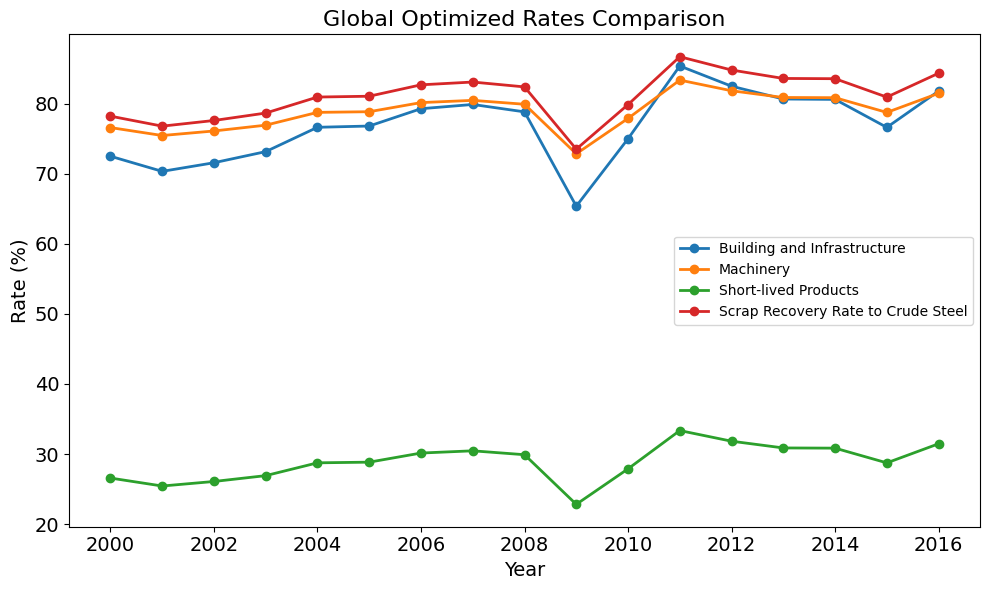

In [153]:
import matplotlib.pyplot as plt

# Data from df_results
years = df_results['year']

# Assuming df_results contains the following columns for rates
build_infra_rate = df_results['build_infra_rate']
machinery_rate = df_results['machinery_rate']
short_lived_products_rate = df_results['short_lived_products_rate']
recovery_rate = df_results['recovery_rate']

# Create a line plot
plt.figure(figsize=(10, 6))

# Plot each rate as a separate line
plt.plot(years, build_infra_rate, marker='o', linestyle='-', linewidth=2, label='Building and Infrastructure')
plt.plot(years, machinery_rate, marker='o', linestyle='-', linewidth=2, label='Machinery')
plt.plot(years, short_lived_products_rate, marker='o', linestyle='-', linewidth=2, label='Short-lived Products')
plt.plot(years, recovery_rate, marker='o', linestyle='-', linewidth=2, label='Scrap Recovery Rate to Crude Steel')

# Adding labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rate (%)', fontsize=14)
plt.title('Global Optimized Rates Comparison', fontsize=16)
plt.legend()  # Add a legend to clarify which line is which
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# Show the plot
plt.tight_layout()
plt.savefig(plot_path + "optimized_rates.pdf", dpi=600)
plt.show()

### Pre-processing

In [23]:
df = pd.read_csv(raw_path + "MISO2_by_enduse.xlsx.csv")
df = df[df["material"] == "iron_steel"]
df = df[df["name"] == "F_10_11_supply_EoL_waste_enduse"]

# Select the columns from 'region', 'material', and 'sector' + columns from 2000 to 2016
selected_columns = ['region', 'sector'] + [str(year) for year in range(2000, 2017)]
df = df[selected_columns]
df

,region,sector,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
37,Afghanistan,Residential_buildings,0.321931,0.332929,0.344533,0.356812,0.369838,0.383689,0.398445,0.414189,0.431004,0.448975,0.468184,0.488712,0.510634,0.534018,0.558925,0.585404,0.613491
38,Afghanistan,Non_residential_buildings,1.094904,1.160011,1.229809,1.304290,1.383342,1.466738,1.554129,1.645042,1.738886,1.834959,1.932470,2.030559,2.128336,2.224924,2.319510,2.411409,2.500121
39,Afghanistan,Civil_engineering_except_roads,0.161495,0.170553,0.179874,0.189457,0.199302,0.209412,0.219788,0.230433,0.241354,0.252557,0.264051,0.275845,0.287954,0.300393,0.313180,0.326336,0.339885
40,Afghanistan,Machinery_and_equipment,3.332742,3.418695,3.479480,3.514118,3.522386,3.505109,3.464715,3.406550,3.341650,3.290563,3.285711,3.369025,3.584220,3.967265,4.540716,5.315400,6.298104
41,Afghanistan,Computers_and_precision_instruments,0.229041,0.207480,0.195604,0.193550,0.210210,0.289024,0.523016,0.965170,1.492413,1.873328,2.004809,2.012255,2.134206,2.540549,3.212803,3.977129,4.676394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26061,Uzbekistan,Furniture_and_other_manufactured_goods_nec,12.250744,12.151653,11.907808,11.525107,11.070892,10.673964,10.467642,10.511603,10.767332,11.144085,11.561474,11.981443,12.409791,12.883946,13.459381,14.204002,15.193528
26062,Uzbekistan,Textiles,33.065828,29.811482,24.174094,24.387036,27.886011,29.245300,29.628407,33.661071,36.790721,40.513240,49.987496,57.566665,61.349505,61.736518,64.030957,67.654128,80.525022
26063,Uzbekistan,Printed_matter_and_recorded_media,0.045359,0.042834,0.037659,0.032957,0.031083,0.031447,0.031205,0.028399,0.023602,0.018682,0.015099,0.013560,0.014130,0.016103,0.018430,0.020491,0.022559
26064,Uzbekistan,Food_packaging,2.909813,3.775720,2.829625,3.223196,3.397143,5.281891,4.624719,4.780547,6.799193,7.496857,10.768263,9.588370,8.504793,18.100115,17.622302,17.697420,15.577572


In [24]:
len(df["sector"].unique())

13

In [25]:
2288 * 13

29744

In [33]:
dfs = []

for sector in df["sector"].unique():
    df_sec = df[df["sector"] == sector]
    df_sec = df_sec.groupby('region', as_index=False).sum(numeric_only=True)
    df_sec = df_sec.melt(id_vars=["region"], var_name='Year', value_name='EOL')
    df_sec = ssm.add_iso3_column(df_sec, "region")
    df_sec["sector"] = sector
    dfs.append(df_sec)

df_merged = pd.concat(dfs)
df_merged

Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']
Country Not Found: ['Serbia (incl. Kosovo)']


,region,Year,EOL,ISO3,sector
0,Afghanistan,2000,0.321931,AFG,Residential_buildings
1,Albania,2000,0.043131,ALB,Residential_buildings
2,Algeria,2000,6.593002,DZA,Residential_buildings
3,Angola,2000,2.131012,AGO,Residential_buildings
4,Argentina,2000,45.698859,ARG,Residential_buildings
...,...,...,...,...,...
2987,Venezuela,2016,89.722050,VEN,Products_nec
2988,Vietnam,2016,160.473721,VNM,Products_nec
2989,Yemen,2016,15.117043,YEM,Products_nec
2990,Zambia,2016,4.633479,ZMB,Products_nec


In [27]:
# We need to solve the issue with Serbia (incl. Kosovo) using the population based distribution 
ds_pop = xr.open_dataset(atlas_path + "Bh.population.2000-2020.a.nc")
ds_pop = ds_pop["population_count"].sel(time=slice("2000-01-01", "2016-01-01")).to_dataset()
ds_pop

<xarray.Dataset> Size: 9MB
Dimensions:           (lat: 180, lon: 360, time: 17)
Coordinates:
  * lat               (lat) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon               (lon) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * time              (time) datetime64[ns] 136B 2000-01-01 ... 2016-01-01
Data variables:
    population_count  (time, lat, lon) float64 9MB ...

In [37]:
dfs_pop = []

for time in list(range(2000, 2017, 1)):
    time_str = f'{time}-01-01'
    df_pop = st.grid_2_table(dataset=ds_pop, time=time_str, verbose="yes")
    df_pop["Year"] = time
    dfs_pop.append(df_pop)

df_pop = pd.concat(dfs_pop)
df_pop

List of variables to process: ['population_count']
Global gridded stats for population_count: 6026137017.61
Global tabular stats for population_count: 6025277234.26
List of variables to process: ['population_count']
Global gridded stats for population_count: 6091832416.25
Global tabular stats for population_count: 6090979414.69
List of variables to process: ['population_count']
Global gridded stats for population_count: 6160275646.96
Global tabular stats for population_count: 6159438237.33
List of variables to process: ['population_count']
Global gridded stats for population_count: 6231476681.38
Global tabular stats for population_count: 6230650806.31
List of variables to process: ['population_count']
Global gridded stats for population_count: 6305452795.86
Global tabular stats for population_count: 6304635228.18
List of variables to process: ['population_count']
Global gridded stats for population_count: 6383573394.40
Global tabular stats for population_count: 6382765999.39
List of va

,ISO3,population_count,Year
0,ABW,1.808842e+04,2000
1,AFG,2.236783e+07,2000
2,AGO,2.080530e+07,2000
3,AIA,3.209225e+04,2000
4,ALB,3.140499e+06,2000
...,...,...,...
241,YEM,2.736742e+07,2016
242,ZAF,5.617547e+07,2016
243,ZMB,1.611577e+07,2016
244,ZWE,1.380970e+07,2016


In [38]:
df_srb = df_merged[df_merged["region"] == 'Serbia (incl. Kosovo)']
df_srb

,region,Year,EOL,ISO3,sector
135,Serbia (incl. Kosovo),2000,2.528722,NaN,Residential_buildings
311,Serbia (incl. Kosovo),2001,2.723472,NaN,Residential_buildings
487,Serbia (incl. Kosovo),2002,2.936071,NaN,Residential_buildings
663,Serbia (incl. Kosovo),2003,3.167927,NaN,Residential_buildings
839,Serbia (incl. Kosovo),2004,3.420487,NaN,Residential_buildings
...,...,...,...,...,...
2247,Serbia (incl. Kosovo),2012,17.848181,NaN,Products_nec
2423,Serbia (incl. Kosovo),2013,20.424626,NaN,Products_nec
2599,Serbia (incl. Kosovo),2014,23.357320,NaN,Products_nec
2775,Serbia (incl. Kosovo),2015,26.513683,NaN,Products_nec


In [39]:
df_pop_srb_xkx = df_pop[(df_pop["ISO3"] == "SRB") | (df_pop["ISO3"] == "XKX")]
df_pop_srb_xkx

,ISO3,population_count,Year
200,SRB,8.728448e+06,2000
240,XKX,0.000000e+00,2000
200,SRB,8.707248e+06,2001
240,XKX,0.000000e+00,2001
200,SRB,8.691186e+06,2002
240,XKX,0.000000e+00,2002
200,SRB,8.674887e+06,2003
240,XKX,0.000000e+00,2003
200,SRB,8.662385e+06,2004
240,XKX,0.000000e+00,2004


In [40]:
# Calculate total population per year using .loc to avoid the SettingWithCopyWarning
df_pop_srb_xkx.loc[:, 'total_population'] = df_pop_srb_xkx.groupby('Year')['population_count'].transform('sum')

# Calculate population fraction for each country
df_pop_srb_xkx.loc[:, 'population_fraction'] = df_pop_srb_xkx['population_count'] / df_pop_srb_xkx['total_population']
df_pop_srb_xkx


/var/folders/9q/h2qmn7kd1c74_3nmyzcf2mdc0000gn/T/ipykernel_75667/1947063611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_srb_xkx.loc[:, 'total_population'] = df_pop_srb_xkx.groupby('Year')['population_count'].transform('sum')
/var/folders/9q/h2qmn7kd1c74_3nmyzcf2mdc0000gn/T/ipykernel_75667/1947063611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_srb_xkx.loc[:, 'population_fraction'] = df_pop_srb_xkx['population_count'] / df_pop_srb_xkx['total_population']


,ISO3,population_count,Year,total_population,population_fraction
200,SRB,8.728448e+06,2000,8.728448e+06,1.000000
240,XKX,0.000000e+00,2000,8.728448e+06,0.000000
200,SRB,8.707248e+06,2001,8.707248e+06,1.000000
240,XKX,0.000000e+00,2001,8.707248e+06,0.000000
200,SRB,8.691186e+06,2002,8.691186e+06,1.000000
240,XKX,0.000000e+00,2002,8.691186e+06,0.000000
200,SRB,8.674887e+06,2003,8.674887e+06,1.000000
240,XKX,0.000000e+00,2003,8.674887e+06,0.000000
200,SRB,8.662385e+06,2004,8.662385e+06,1.000000
240,XKX,0.000000e+00,2004,8.662385e+06,0.000000


In [41]:
# Create a dictionary with ISO3, Year as keys and population_fraction as values
population_dict = df_pop_srb_xkx[['ISO3', 'Year', 'population_fraction']].set_index(['ISO3', 'Year']).to_dict()['population_fraction']

# Display the dictionary
population_dict

{('SRB', 2000): 1.0,
 ('XKX', 2000): 0.0,
 ('SRB', 2001): 1.0,
 ('XKX', 2001): 0.0,
 ('SRB', 2002): 1.0,
 ('XKX', 2002): 0.0,
 ('SRB', 2003): 1.0,
 ('XKX', 2003): 0.0,
 ('SRB', 2004): 1.0,
 ('XKX', 2004): 0.0,
 ('SRB', 2005): 1.0,
 ('XKX', 2005): 0.0,
 ('SRB', 2006): 1.0,
 ('XKX', 2006): 0.0,
 ('SRB', 2007): 1.0,
 ('XKX', 2007): 0.0,
 ('SRB', 2008): 0.8459075258368596,
 ('XKX', 2008): 0.1540924741631405,
 ('SRB', 2009): 0.8439552548825058,
 ('XKX', 2009): 0.15604474511749428,
 ('SRB', 2010): 0.8419211671613913,
 ('XKX', 2010): 0.1580788328386088,
 ('SRB', 2011): 0.8398402067317171,
 ('XKX', 2011): 0.16015979326828292,
 ('SRB', 2012): 0.8377873631392693,
 ('XKX', 2012): 0.16221263686073076,
 ('SRB', 2013): 0.8355387938417919,
 ('XKX', 2013): 0.16446120615820814,
 ('SRB', 2014): 0.8337503500157217,
 ('XKX', 2014): 0.1662496499842783,
 ('SRB', 2015): 0.8315228216923879,
 ('XKX', 2015): 0.1684771783076121,
 ('SRB', 2016): 0.8294001300144462,
 ('XKX', 2016): 0.1705998699855537}

In [53]:
# Filter the rows for 'Serbia (incl. Kosovo)'
df_serbia_kosovo = df_merged[df_merged["region"] == 'Serbia (incl. Kosovo)'].copy()

# Create two DataFrames, one for SRB and one for XKX
df_srb = df_serbia_kosovo.copy()
df_xkx = df_serbia_kosovo.copy()

# Set the 'ISO3' for each DataFrame
df_srb['ISO3'] = 'SRB'
df_xkx['ISO3'] = 'XKX'

# Concatenate the two DataFrames
df_duplicated = pd.concat([df_srb, df_xkx])

# Reset the index to avoid duplicates in index
df_duplicated.reset_index(drop=True, inplace=True)
df_duplicated

,region,Year,EOL,ISO3,sector
0,Serbia (incl. Kosovo),2000,2.528722,SRB,Residential_buildings
1,Serbia (incl. Kosovo),2001,2.723472,SRB,Residential_buildings
2,Serbia (incl. Kosovo),2002,2.936071,SRB,Residential_buildings
3,Serbia (incl. Kosovo),2003,3.167927,SRB,Residential_buildings
4,Serbia (incl. Kosovo),2004,3.420487,SRB,Residential_buildings
...,...,...,...,...,...
437,Serbia (incl. Kosovo),2012,17.848181,XKX,Products_nec
438,Serbia (incl. Kosovo),2013,20.424626,XKX,Products_nec
439,Serbia (incl. Kosovo),2014,23.357320,XKX,Products_nec
440,Serbia (incl. Kosovo),2015,26.513683,XKX,Products_nec


In [58]:
df_duplicated["EOL"].sum() # double 

np.float64(31526.48694451942)

In [61]:
# Merge the population data (population_fraction) with the duplicated DataFrame
df_duplicated['Year'] = df_duplicated['Year'].astype(int)
df_duplicated['population_fraction'] = df_duplicated.apply(
    lambda row: population_dict.get((row['ISO3'], row['Year']), 0), axis=1
)

# Now, distribute the stock based on population_fraction
df_duplicated['EOL'] = df_duplicated['EOL'] * df_duplicated['population_fraction']
# Drop the 'population_fraction' column
df_duplicated.drop(columns=['population_fraction'], inplace=True)
df_duplicated

,region,Year,EOL,ISO3,sector
0,Serbia (incl. Kosovo),2000,2.528722,SRB,Residential_buildings
1,Serbia (incl. Kosovo),2001,2.723472,SRB,Residential_buildings
2,Serbia (incl. Kosovo),2002,2.936071,SRB,Residential_buildings
3,Serbia (incl. Kosovo),2003,3.167927,SRB,Residential_buildings
4,Serbia (incl. Kosovo),2004,3.420487,SRB,Residential_buildings
...,...,...,...,...,...
437,Serbia (incl. Kosovo),2012,2.895201,XKX,Products_nec
438,Serbia (incl. Kosovo),2013,3.359059,XKX,Products_nec
439,Serbia (incl. Kosovo),2014,3.883146,XKX,Products_nec
440,Serbia (incl. Kosovo),2015,4.466950,XKX,Products_nec


In [62]:
df_duplicated["EOL"].sum()

np.float64(15763.243472259708)

In [63]:
# Drop rows where 'ISO3' is NaN
df_filtered = df_merged.dropna(subset=['ISO3'])
# Concatenate the df_filtered with df_duplicated
df_final = pd.concat([df_filtered, df_duplicated], ignore_index=True)
# Sort the DataFrame by 'ISO3', 'Year', and 'sector'
df_final = df_final.sort_values(by=['ISO3', 'Year', 'sector'])
df_final

,region,Year,EOL,ISO3,sector
5950,Afghanistan,2000,0.161495,AFG,Civil_engineering_except_roads
11900,Afghanistan,2000,0.229041,AFG,Computers_and_precision_instruments
14875,Afghanistan,2000,0.775715,AFG,Electrical_equipment
32725,Afghanistan,2000,17.155006,AFG,Food_packaging
23800,Afghanistan,2000,0.554975,AFG,Furniture_and_other_manufactured_goods_nec
...,...,...,...,...,...
23799,Zimbabwe,2016,12.052571,ZWE,Other_transport_equipment
32724,Zimbabwe,2016,0.133013,ZWE,Printed_matter_and_recorded_media
38674,Zimbabwe,2016,2.594125,ZWE,Products_nec
2974,Zimbabwe,2016,8.644913,ZWE,Residential_buildings


In [64]:
# final check !
print(df_merged["EOL"].sum())
print(df_final["EOL"].sum())

6425655.1280136425
6425655.1280136425


In [65]:
df_final.to_csv(raw_path + "MISO2_iron_steel_EOL_2000-2016_srb_xkx_fixed.csv")

### Gridding EOL

In [8]:
df = pd.read_csv(raw_path + "MISO2_iron_steel_EOL_2000-2016_srb_xkx_fixed.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,region,Year,EOL,ISO3,sector
0,Afghanistan,2000,0.161495,AFG,Civil_engineering_except_roads
1,Afghanistan,2000,0.229041,AFG,Computers_and_precision_instruments
2,Afghanistan,2000,0.775715,AFG,Electrical_equipment
3,Afghanistan,2000,17.155006,AFG,Food_packaging
4,Afghanistan,2000,0.554975,AFG,Furniture_and_other_manufactured_goods_nec
...,...,...,...,...,...
39112,Zimbabwe,2016,12.052571,ZWE,Other_transport_equipment
39113,Zimbabwe,2016,0.133013,ZWE,Printed_matter_and_recorded_media
39114,Zimbabwe,2016,2.594125,ZWE,Products_nec
39115,Zimbabwe,2016,8.644913,ZWE,Residential_buildings


In [9]:
variables = [
    "Residential_buildings",
    "Non_residential_buildings",
    "Machinery_and_equipment",
    "Civil_engineering_except_roads", 
    "Motor_vehicles_trailers_and_semi-trailers", 
    "Other_transport_equipment",
    "Computers_and_precision_instruments",
    "Electrical_equipment",
    "Furniture_and_other_manufactured_goods_nec",
    "Printed_matter_and_recorded_media",
    "Food_packaging",
    "Products_nec",
    "Textiles"
]

long_names = [
    "Residential buildings",
    "Non residential buildings",
    "Machinery and equipment",
    "Civil engineering except roads",
    "Motor vehicles trailers and semi trailers",
    "Other transport equipment",
    "Computers and precision instruments",
    "Electrical equipment",
    "Furniture and other manufactured goods nec",
    "Printed matter and recorded media",
    "Food packaging",
    "Products nec",
    "Textiles"
]


In [10]:
dList_sg = []
for var in variables:
    filename = var + "_surrogate.2000-2016.a.nc"
    ds_sg = xr.open_dataset(output_path + filename)
    ds_sg = ds_sg[[var]]
    dList_sg.append(ds_sg)

ds_sg = xr.merge(dList_sg)
ds_sg = ds_sg.where(ds_sg != 0, np.nan)
threshold = 1e-9  # Define your threshold, e.g., values smaller than 1e-6
ds_sg = ds_sg.where(ds_sg >= threshold, np.nan)
ds_sg

<xarray.Dataset> Size: 115MB
Dimensions:                                     (time: 17, lat: 180, lon: 360)
Coordinates:
  * lon                                         (lon) float64 3kB -179.5 ... ...
  * lat                                         (lat) float64 1kB 89.5 ... -89.5
  * time                                        (time) datetime64[ns] 136B 20...
Data variables: (12/13)
    Residential_buildings                       (time, lat, lon) float64 9MB ...
    Non_residential_buildings                   (time, lat, lon) float64 9MB ...
    Machinery_and_equipment                     (time, lat, lon) float64 9MB ...
    Civil_engineering_except_roads              (time, lat, lon) float64 9MB ...
    Motor_vehicles_trailers_and_semi-trailers   (time, lat, lon) float64 9MB ...
    Other_transport_equipment                   (time, lat, lon) float64 9MB ...
    ...                                          ...
    Electrical_equipment                        (time, lat, lon) float64 9MB ...
    Furniture_and_other_manufactured_goods_nec  (time, lat, lon) float64 9MB ...
    Printed_matter_and_recorded_media           (time, lat, lon) float64 9MB ...
    Food_packaging                              (time, lat, lon) float64 9MB ...
    Products_nec                                (time, lat, lon) float64 9MB ...
    Textiles                                    (time, lat, lon) float64 9MB ...

In [11]:
source = "Dominik, et al. (2024). From Extraction to End-uses and Waste Management: Modelling Economy-wide Material Cycles and Stock Dynamics Around the World. Available at SSRN 4794611."

for var, long_name in zip(variables, long_names):
    # Filter the DataFrame for the specific sector
    df_sector = df[df["sector"] == var].copy()
    df_sector["EOL_g"] = df_sector["EOL"] * 1e9  # kt to g
    filename = var + "_surrogate.2000-2016.a.nc"
    ds_sg = xr.open_dataset(output_path + filename)

    # Initialize an empty list to store datasets for all time steps
    dataset_list = []
    
    # Process each time step
    for time in df["Year"].unique():
        df_time = df_sector[df_sector["Year"] == time].copy()
        time_str = f'{time}-01-01'
        
        # Create the dataset for the current time step
        ds = ssm.table_2_grid(
            surrogate_data=ds_sg,
            surrogate_variable=var,
            tabular_column="EOL_g", 
            tabular_data=df_time 
            variable_name=var, 
            long_name=long_name, 
            units="g m-2 y-1", 
            time=time_str, 
            source=source, 
            normalize_by_area="yes", 
            verbose="yes"
        )
        
        # Append the dataset to the list
        dataset_list.append(ds)
    
    # Merge all time-step datasets into a single dataset
    merged_ds = xr.merge(dataset_list)
    
    # Save the merged dataset to a single NetCDF file
    nc_name = "EOL_" + var + '.2000-2016.a.nc'
    merged_ds.to_netcdf(output_path + nc_name)
    print(f"Saved NetCDF for {var}: {output_path + nc_name}")


Distributing Residential_buildings onto Residential_buildings.
Global sum of jurisdictional dataset : 13555074283939.955
Global stats after gridding: 13555074283939.95
Distributing Residential_buildings onto Residential_buildings.
Global sum of jurisdictional dataset : 14048726863164.809
Global stats after gridding: 14048726863164.81
Distributing Residential_buildings onto Residential_buildings.
Global sum of jurisdictional dataset : 14567844965327.197
Global stats after gridding: 14567844965327.20
Distributing Residential_buildings onto Residential_buildings.
Global sum of jurisdictional dataset : 15113770548193.992
Global stats after gridding: 15113770548194.00
Distributing Residential_buildings onto Residential_buildings.
Global sum of jurisdictional dataset : 15687763085974.035
Global stats after gridding: 15687763085974.04
Distributing Residential_buildings onto Residential_buildings.
Global sum of jurisdictional dataset : 16290981528249.637
Global stats after gridding: 1629098152

In [12]:
nc_paths = glob.glob(output_path + "EOL*")

dataset_list = []
for nc in nc_paths:
    ds_s = xr.open_dataset(nc)
    dataset_list.append(ds_s)

merged_ds = xr.merge(dataset_list)
merged_ds

<xarray.Dataset> Size: 116MB
Dimensions:                                     (lat: 180, lon: 360, time: 17)
Coordinates:
  * lat                                         (lat) float64 1kB -89.5 ... 89.5
  * lon                                         (lon) float64 3kB -179.5 ... ...
  * time                                        (time) datetime64[ns] 136B 20...
Data variables: (12/15)
    Printed_matter_and_recorded_media           (time, lat, lon) float64 9MB ...
    grid_area                                   (lat, lon) float64 518kB 1.08...
    land_frac                                   (lat, lon) float64 518kB 0.00...
    Other_transport_equipment                   (time, lat, lon) float64 9MB ...
    Residential_buildings                       (time, lat, lon) float64 9MB ...
    Electrical_equipment                        (time, lat, lon) float64 9MB ...
    ...                                          ...
    Motor_vehicles_trailers_and_semi-trailers   (time, lat, lon) float64 9MB ...
    Non_residential_buildings                   (time, lat, lon) float64 9MB ...
    Computers_and_precision_instruments         (time, lat, lon) float64 9MB ...
    Machinery_and_equipment                     (time, lat, lon) float64 9MB ...
    Textiles                                    (time, lat, lon) float64 9MB ...
    Furniture_and_other_manufactured_goods_nec  (time, lat, lon) float64 9MB ...
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

In [49]:
def sum_all_variables(ds, dataset_name):
    # Variables to exclude from the sum
    exclude_vars = ["time", "lat", "lon", "land_frac", "land_area", "grid_area"]
    
    # Identify the variables to sum
    variables_list = [var for var in ds.data_vars if var not in exclude_vars]

    # Initialize an empty DataArray to store the sum
    da_sum = None

    # Sum all variables across dimensions except 'time'
    for var in variables_list:
        # Replace NaN values with zeros
        ds_var_filled = ds[var].fillna(0)
        
        # Perform the sum while keeping the time dimension
        if da_sum is None:
            da_sum = ds_var_filled
        else:
            da_sum += ds_var_filled

    # Convert the summed DataArray to a Dataset
    ds_sum = da_sum.to_dataset(name=dataset_name)

    return ds_sum

In [20]:
attrs = {'long_name': 'Gross EOL of Iron/Steel',
 'units': 'g m-2 y-1',
 'source': 'Dominik, et al. (2024). From Extraction to End-uses and Waste Management: Modelling Economy-wide Material Cycles and Stock Dynamics Around the World. Available at SSRN 4794611.'}

In [21]:
gross_ds = sum_all_variables(merged_ds, 'EOL_total')
gross_ds = gross_ds.where(gross_ds["EOL_total"] != 0, np.nan)
# Modify the long_name attribute
gross_ds["EOL_total"].attrs = attrs
gross_ds

<xarray.Dataset> Size: 9MB
Dimensions:    (time: 17, lat: 180, lon: 360)
Coordinates:
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time       (time) datetime64[ns] 136B 2000-01-01 2001-01-01 ... 2016-01-01
Data variables:
    EOL_total  (time, lat, lon) float64 9MB nan nan nan nan ... nan nan nan nan

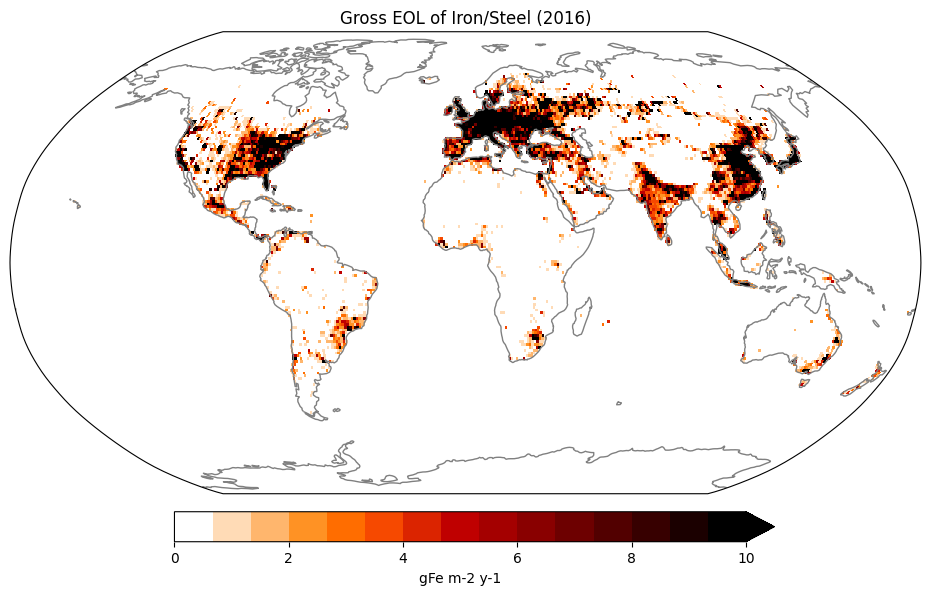

In [23]:
dd = gross_ds.sel(time='2016-01-01')
ssm.plot_map( dd, "EOL_total", color="gist_heat_r", vmin=0, vmax=10, extend_max=True,
            title= 'Gross EOL of Iron/Steel (2016)', label='gFe m-2 y-1', levels=15)

In [24]:
combined_ds = xr.merge([merged_ds, gross_ds])
combined_ds

<xarray.Dataset> Size: 124MB
Dimensions:                                     (lat: 180, lon: 360, time: 17)
Coordinates:
  * lat                                         (lat) float64 1kB -89.5 ... 89.5
  * lon                                         (lon) float64 3kB -179.5 ... ...
  * time                                        (time) datetime64[ns] 136B 20...
Data variables: (12/16)
    Printed_matter_and_recorded_media           (time, lat, lon) float64 9MB ...
    grid_area                                   (lat, lon) float64 518kB 1.08...
    land_frac                                   (lat, lon) float64 518kB 0.00...
    Other_transport_equipment                   (time, lat, lon) float64 9MB ...
    Residential_buildings                       (time, lat, lon) float64 9MB ...
    Electrical_equipment                        (time, lat, lon) float64 9MB ...
    ...                                          ...
    Non_residential_buildings                   (time, lat, lon) float64 9MB ...
    Computers_and_precision_instruments         (time, lat, lon) float64 9MB ...
    Machinery_and_equipment                     (time, lat, lon) float64 9MB ...
    Textiles                                    (time, lat, lon) float64 9MB ...
    Furniture_and_other_manufactured_goods_nec  (time, lat, lon) float64 9MB ...
    EOL_total                                   (time, lat, lon) float64 9MB ...
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

In [25]:
combined_ds.to_netcdf(netcdf_path + "T.iron_enduse.eol.2000-2016.a.nc")

In [156]:
# Define sector mappings (groupings)
sector_groups = {
    "build_infra": ["Residential_buildings", "Non_residential_buildings", "Civil_engineering_except_roads"],
    "machinery": ["Motor_vehicles_trailers_and_semi-trailers",
                    "Other_transport_equipment", "Machinery_and_equipment", 
                    "Computers_and_precision_instruments", 
                    "Electrical_equipment"],
    "short_lived_products": ["Furniture_and_other_manufactured_goods_nec", 
                            "Printed_matter_and_recorded_media", 
                            "Food_packaging", 
                            "Products_nec", 
                            "Textiles"]
}

In [157]:
dataset_list = []
for variable, var_list in sector_groups.items():
    print(variable)
    print(var_list)
    
    # Initialize an empty DataArray to store the sum
    da_sum = None

    # Sum all variables across dimensions except 'time'
    for var in var_list:
        # Replace NaN values with zeros
        ds_var_filled = ds[var].fillna(0)
        
        # Perform the sum while keeping the time dimension
        if da_sum is None:
            da_sum = ds_var_filled
        else:
            da_sum += ds_var_filled

    # Convert the summed DataArray to a Dataset
    ds_sum = da_sum.to_dataset(name=variable)
    dataset_list.append(ds_sum)
    print("Done!", variable)
    
merged_ds = xr.merge(dataset_list)
merged_ds

build_infra
['Residential_buildings', 'Non_residential_buildings', 'Civil_engineering_except_roads']
Done! build_infra
machinery
['Motor_vehicles_trailers_and_semi-trailers', 'Other_transport_equipment', 'Machinery_and_equipment', 'Computers_and_precision_instruments', 'Electrical_equipment']
Done! machinery
short_lived_products
['Furniture_and_other_manufactured_goods_nec', 'Printed_matter_and_recorded_media', 'Food_packaging', 'Products_nec', 'Textiles']
Done! short_lived_products


<xarray.Dataset> Size: 26MB
Dimensions:               (lat: 180, lon: 360, time: 17)
Coordinates:
  * lat                   (lat) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                   (lon) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * time                  (time) datetime64[ns] 136B 2000-01-01 ... 2016-01-01
Data variables:
    build_infra           (time, lat, lon) float64 9MB 0.0 0.0 0.0 ... 0.0 0.0
    machinery             (time, lat, lon) float64 9MB 0.0 0.0 0.0 ... 0.0 0.0
    short_lived_products  (time, lat, lon) float64 9MB 0.0 0.0 0.0 ... 0.0 0.0

In [159]:
# Convert 'year' to datetime format that matches your ds_steel['time'] format
df_results['time'] = pd.to_datetime(df_results['year'], format='%Y')

# Drop the old 'year' column
df_results = df_results.drop(columns=['year'])

# Convert DataFrame to xarray Dataset
rates_ds = df_results.set_index('time').to_xarray()
rates_ds

<xarray.Dataset> Size: 1kB
Dimensions:                    (time: 17)
Coordinates:
  * time                       (time) datetime64[ns] 136B 2000-01-01 ... 2016...
Data variables:
    build_infra_rate           (time) float64 136B 72.49 70.33 ... 76.61 81.78
    machinery_rate             (time) float64 136B 76.58 75.45 ... 78.74 81.46
    short_lived_products_rate  (time) float64 136B 26.57 25.44 ... 28.74 31.46
    recovery_rate              (time) float64 136B 78.21 76.78 ... 80.92 84.33
    recy_fe                    (time) float64 136B 1.734e+05 ... 2.66e+05
    post_consumer_scrap        (time) float64 136B 1.734e+05 ... 2.66e+05
    diff_percent               (time) float64 136B 3.285e-09 ... 1.164e-09

In [160]:
# Apply the rates: Assuming merged_ds and rates_ds are now aligned in 'time'
for sector_group in ['build_infra', 'machinery', 'short_lived_products']:
    rate_var = f'{sector_group}_rate'
    merged_ds[sector_group] = merged_ds[sector_group] * (rates_ds[rate_var] / 100) * (rates_ds['recovery_rate'] / 100)

# Now merged_ds contains the adjusted data
merged_ds

<xarray.Dataset> Size: 26MB
Dimensions:               (lat: 180, lon: 360, time: 17)
Coordinates:
  * lat                   (lat) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                   (lon) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * time                  (time) datetime64[ns] 136B 2000-01-01 ... 2016-01-01
Data variables:
    build_infra           (time, lat, lon) float64 9MB 0.0 0.0 0.0 ... 0.0 0.0
    machinery             (time, lat, lon) float64 9MB 0.0 0.0 0.0 ... 0.0 0.0
    short_lived_products  (time, lat, lon) float64 9MB 0.0 0.0 0.0 ... 0.0 0.0

In [161]:
ds_eol = sum_all_variables(merged_ds, "Scrap_from_eol")
ds_eol = xr.where(ds_eol > 0, ds_eol, np.nan)
ds_eol

<xarray.Dataset> Size: 9MB
Dimensions:         (time: 17, lat: 180, lon: 360)
Coordinates:
  * lat             (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon             (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time            (time) datetime64[ns] 136B 2000-01-01 ... 2016-01-01
Data variables:
    Scrap_from_eol  (time, lat, lon) float64 9MB nan nan nan nan ... nan nan nan

In [162]:
(ds_eol["Scrap_from_eol"].sel(time="2016-01-01") * ds["grid_area"]).sum().item() * 1e-9

265977.8310024083

In [163]:
ds_steel = xr.open_dataset(netcdf_path + "T.steel.2000-2022.a.nc")
(ds_steel["post_consumer_scrap"].sel(time='2016-01-01') * ds_steel["grid_area"]).sum().item() * 1e-9

265977.831005504

In [164]:
post_attrs = {'long_name': 'Crude Steel Production from Post-consumer Scraps coming from EOL',
 'units': 'g m-2 y-1',
 'source': 'Ranges of recycling rates for various sectors were adapted from multiple sources and optimized the recycling and recovery rates based on estimated scrap used for crude steel production.'}

ds_eol["Scrap_from_eol"].attrs = post_attrs
ds_eol

<xarray.Dataset> Size: 9MB
Dimensions:         (time: 17, lat: 180, lon: 360)
Coordinates:
  * lat             (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon             (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time            (time) datetime64[ns] 136B 2000-01-01 ... 2016-01-01
Data variables:
    Scrap_from_eol  (time, lat, lon) float64 9MB nan nan nan nan ... nan nan nan

In [168]:
ds_comb = xr.merge([ds, ds_eol])
ds_comb

<xarray.Dataset> Size: 133MB
Dimensions:                                     (lat: 180, lon: 360, time: 17)
Coordinates:
  * lat                                         (lat) float64 1kB -89.5 ... 89.5
  * lon                                         (lon) float64 3kB -179.5 ... ...
  * time                                        (time) datetime64[ns] 136B 20...
Data variables: (12/17)
    Printed_matter_and_recorded_media           (time, lat, lon) float64 9MB ...
    grid_area                                   (lat, lon) float64 518kB 1.08...
    land_frac                                   (lat, lon) float64 518kB 0.00...
    Other_transport_equipment                   (time, lat, lon) float64 9MB ...
    Residential_buildings                       (time, lat, lon) float64 9MB ...
    Electrical_equipment                        (time, lat, lon) float64 9MB ...
    ...                                          ...
    Computers_and_precision_instruments         (time, lat, lon) float64 9MB ...
    Machinery_and_equipment                     (time, lat, lon) float64 9MB ...
    Textiles                                    (time, lat, lon) float64 9MB ...
    Furniture_and_other_manufactured_goods_nec  (time, lat, lon) float64 9MB ...
    EOL_total                                   (time, lat, lon) float64 9MB ...
    Scrap_from_eol                              (time, lat, lon) float64 9MB ...
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

In [169]:
ds = ds_comb
# Sort variables except for the ones that should be at the end
sorted_variables = sorted([var for var in ds.data_vars if var not in ["land_frac", "land_area", "grid_area"]])

# Add the specified variables at the end in the desired order
for var in ["land_frac", "land_area", "grid_area"]:
    if var in ds.data_vars:
        sorted_variables.append(var)

# Create a new dataset with sorted variables and the specified variables at the end
ds_sorted = ds[sorted_variables]
ds_sorted.to_netcdf(netcdf_path + "T.iron_enduse.eol.2000-2016.a.nc")
ds_sorted

<xarray.Dataset> Size: 133MB
Dimensions:                                     (time: 17, lat: 180, lon: 360)
Coordinates:
  * lat                                         (lat) float64 1kB -89.5 ... 89.5
  * lon                                         (lon) float64 3kB -179.5 ... ...
  * time                                        (time) datetime64[ns] 136B 20...
Data variables: (12/17)
    Civil_engineering_except_roads              (time, lat, lon) float64 9MB ...
    Computers_and_precision_instruments         (time, lat, lon) float64 9MB ...
    EOL_total                                   (time, lat, lon) float64 9MB ...
    Electrical_equipment                        (time, lat, lon) float64 9MB ...
    Food_packaging                              (time, lat, lon) float64 9MB ...
    Furniture_and_other_manufactured_goods_nec  (time, lat, lon) float64 9MB ...
    ...                                          ...
    Products_nec                                (time, lat, lon) float64 9MB ...
    Residential_buildings                       (time, lat, lon) float64 9MB ...
    Scrap_from_eol                              (time, lat, lon) float64 9MB ...
    Textiles                                    (time, lat, lon) float64 9MB ...
    land_frac                                   (lat, lon) float64 518kB 0.00...
    grid_area                                   (lat, lon) float64 518kB 1.08...
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

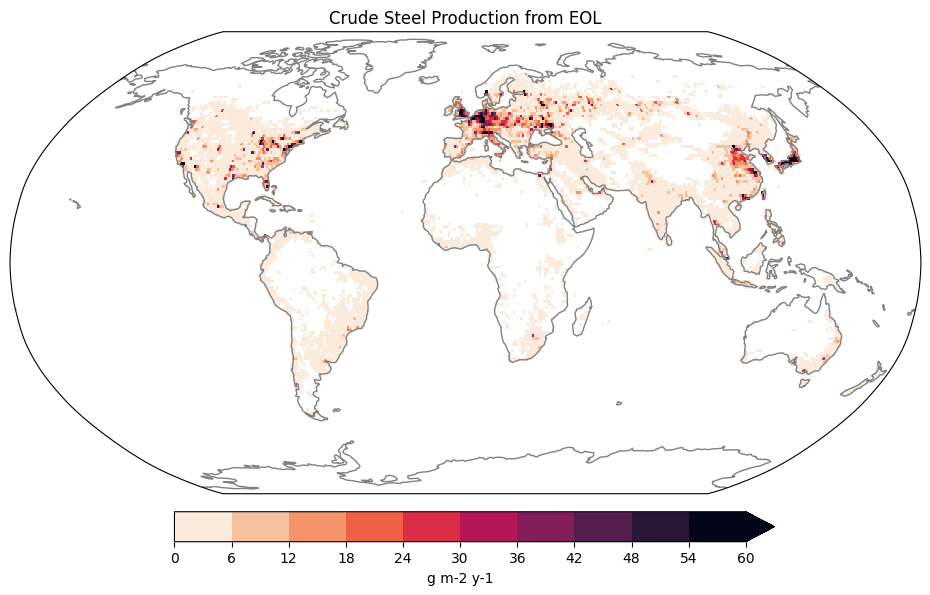

<GeoAxes: title={'center': 'Crude Steel Production from EOL'}>

In [170]:
ds_comb = xr.open_dataset(netcdf_path + "T.iron_enduse.eol.2000-2016.a.nc")
ds_comb = ds_comb.where(ds_comb>=0.1, np.nan)

ssm.plot_map(ds_comb.isel(time=-1), "Scrap_from_eol", color="rocket_r", vmin=0, vmax=60, extend_max=True,
            title="Crude Steel Production from EOL", label="g m-2 y-1")
